<center><h1 style="color: #011f4b;">PROYECTO DE CLASE - ANÁLISIS DE SERIES DE TIEMPO</h1></center>


<center><h2 style="color: #03396c;">SERIE: ANÁLISIS DE COTIZACIONES EN BOLSA - ACCIONES DE ARGOS</h2></center>

<span style="color: #03396c;">**Autor:**</span>
- Cesar Prieto


<h2 style="color: #03396c;">INTRODUCCION</h2>

La base de datos fue tomada de la pagina _https://es.investing.com/equities/grupoargos-historical-data_ la cual proporciona estos datos de manera gratuita al publico, la inspiracion para desarrollar este trabajo con esta base es conocer como se comportan los metodos aprendidos en clase en un enfoque econocimo y sobre todo en el area de las acciones, con lo cual decidimos tomar los datos de un grupo empresarial Colombiano y realizar el analisis correspondiente para desarrollar el proyecto para la clase de series de tiempo. 

<span style="color: #03396c;">**Descripcion de la base:**</span>
- Acciones <span style="color: #03396c;">**DIARIAS**</span> del Grupo ARGOS
- 3401 Datos tomado (Desde el 7/11/20114 Hasta 28/02/2024)
- Variables: Fecha, Último, <span style="color: #03396c;">**_Apertura_**</span>, Máximo, Mínimo, Vol, %Var.

In [1]:
# Color2  <span style="color: #03396c;"></span>

<h2 style="color: #011f4b;">IMPORTACION Y LIMPIEZA DE DATOS</h2>

Paquetes necesarios para el desarrollo del problema

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import plotly.express as px
from sklearn import __version__ as sklearn_version
from sklearn import *

import os

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
current_dir = os.getcwd()
pro_series_dir = os.path.abspath(os.path.join(current_dir, '..', '..', '..'))
pro_series_dir

'C:\\Users\\Cesar Prieto\\Documents\\REPOS GIT\\Pro-Series\\Pro-Series'

In [5]:
# Construir la ruta a la carpeta de Datos
data_folder_path = os.path.join(pro_series_dir, 'Datos')
data_folder_path = data_folder_path + os.sep
data_folder_path

'C:\\Users\\Cesar Prieto\\Documents\\REPOS GIT\\Pro-Series\\Pro-Series\\Datos\\'

In [6]:
# Cargar el archivo CSV en un DataFrame de pandas
ARGOS = pd.read_csv(data_folder_path + "G_ARGOS.csv", sep=';')

In [7]:
ARGOS['Fecha'] = pd.to_datetime(ARGOS['Fecha'], format='%d/%m/%Y')

ARGOS.info()
print(ARGOS)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2440 entries, 0 to 2439
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Fecha     2440 non-null   datetime64[ns]
 1   Último    2440 non-null   object        
 2   Apertura  2440 non-null   object        
 3   Máximo    2440 non-null   object        
 4   Mínimo    2440 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 95.4+ KB
          Fecha     Último   Apertura     Máximo     Mínimo
0    2019-12-30  17.800,00  18.280,00  18.280,00  17.800,00
1    2019-12-27  18.300,00  18.120,00  18.400,00  18.040,00
2    2019-12-26  18.120,00  18.240,00  18.340,00  18.060,00
3    2019-12-24  18.340,00  18.220,00  18.780,00  18.200,00
4    2019-12-23  18.880,00  18.360,00  18.960,00  18.360,00
...         ...        ...        ...        ...        ...
2435 2010-01-08  20.300,00  19.700,00  20.300,00  19.700,00
2436 2010-01-07  19.980,00  19.7

In [8]:
FC = pd.DataFrame({'Fecha': pd.date_range(start=ARGOS['Fecha'].min(), end=ARGOS['Fecha'].max(), freq='D')})
FC.info()
print(FC)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3648 entries, 0 to 3647
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   3648 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 28.6 KB
          Fecha
0    2010-01-04
1    2010-01-05
2    2010-01-06
3    2010-01-07
4    2010-01-08
...         ...
3643 2019-12-26
3644 2019-12-27
3645 2019-12-28
3646 2019-12-29
3647 2019-12-30

[3648 rows x 1 columns]


In [9]:
# Combinar DataFrame de fechas completas con datos existentes
ARGOS = pd.merge(FC, ARGOS, on='Fecha', how='left')

# Rellenar los valores faltantes usando el último valor conocido (last observation carried forward)
# Rellenar los valores faltantes usando el método ffill() 
ARGOS['Último'] = ARGOS['Último'].ffill()
ARGOS['Apertura'] = ARGOS['Apertura'].ffill()
ARGOS['Máximo'] = ARGOS['Máximo'].ffill()
ARGOS['Mínimo'] = ARGOS['Mínimo'].ffill()

ARGOS.info()
ARGOS.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3648 entries, 0 to 3647
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Fecha     3648 non-null   datetime64[ns]
 1   Último    3648 non-null   object        
 2   Apertura  3648 non-null   object        
 3   Máximo    3648 non-null   object        
 4   Mínimo    3648 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 142.6+ KB


Fecha     Último   Apertura     Máximo     Mínimo
0 2010-01-04  18.980,00  18.980,00  19.700,00  18.980,00
1 2010-01-05  19.560,00  19.500,00  19.560,00  19.100,00
2 2010-01-06  19.780,00  19.400,00  19.780,00  19.360,00
3 2010-01-07  19.980,00  19.700,00  19.980,00  19.700,00
4 2010-01-08  20.300,00  19.700,00  20.300,00  19.700,00

In [10]:
# Convertir la columna de fecha al formato de fecha
ARGOS['Fecha'] = pd.to_datetime(ARGOS['Fecha'], format='%d/%m/%Y')

# Convertir las comas en puntos en las columnas numéricas
columnas_numericas = ['Último', 'Apertura', 'Máximo', 'Mínimo']
# Eliminar los puntos de los números antes de convertirlos a float
ARGOS[columnas_numericas] = ARGOS[columnas_numericas].replace(r'\,', '.', regex=True)
ARGOS[columnas_numericas] = ARGOS[columnas_numericas].replace(r'\.', '', regex=True)

# Convertir las columnas numéricas al tipo float
ARGOS[columnas_numericas] = ARGOS[columnas_numericas].astype(float)

# Dividir entre 1000 para eliminar los ceros adicionales
ARGOS[columnas_numericas] = ARGOS[columnas_numericas].div(100000)

# Reordenar el DataFrame por fecha de la más antigua a la más reciente
ARGOS = ARGOS.sort_values(by='Fecha')

# Reiniciar el índice
ARGOS = ARGOS.reset_index(drop=True)

In [11]:
ARGOS.info()
print(ARGOS)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3648 entries, 0 to 3647
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Fecha     3648 non-null   datetime64[ns]
 1   Último    3648 non-null   float64       
 2   Apertura  3648 non-null   float64       
 3   Máximo    3648 non-null   float64       
 4   Mínimo    3648 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 142.6 KB
          Fecha  Último  Apertura  Máximo  Mínimo
0    2010-01-04   18.98     18.98   19.70   18.98
1    2010-01-05   19.56     19.50   19.56   19.10
2    2010-01-06   19.78     19.40   19.78   19.36
3    2010-01-07   19.98     19.70   19.98   19.70
4    2010-01-08   20.30     19.70   20.30   19.70
...         ...     ...       ...     ...     ...
3643 2019-12-26   18.12     18.24   18.34   18.06
3644 2019-12-27   18.30     18.12   18.40   18.04
3645 2019-12-28   18.30     18.12   18.40   18.04
3646 2019-1

Hasta este punto solo hemos preparado nuestros datos, asegurandonos que las variables tuvieran el tipo correcto de dato, y para una exploracion más sencilla la conversion o el reescalado de las variables numericas que respresentan un valor de la accion, las cuales son: _Último, Apertura, Máximo y Mínimo_, este reescalado mencionado consiste en eliminar los miles "000", es decir 3 ceros, de los valores obtenidos.

A continuacion nos disponemos a revisar como se verian las series de estas variables.

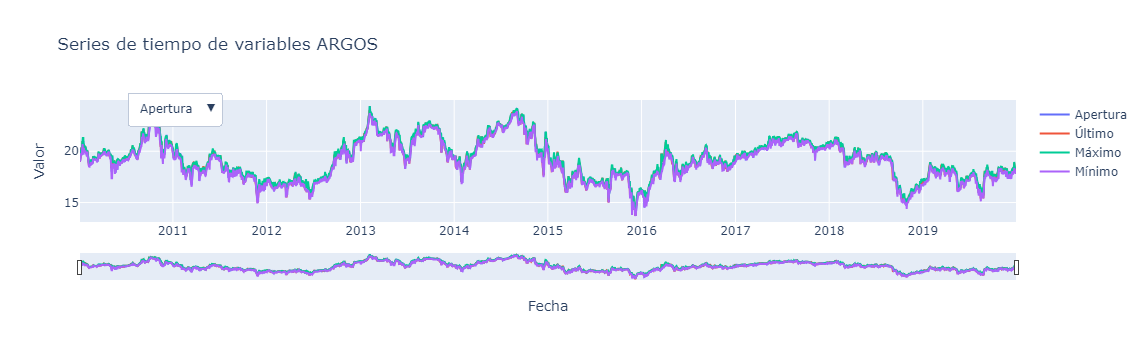

In [12]:
import plotly.graph_objects as go

# Crear una figura de plotly
fig = go.Figure()

# Agregar cada línea al gráfico
fig.add_trace(go.Scatter(x=ARGOS['Fecha'], y=ARGOS['Apertura'], mode='lines', name='Apertura'))
fig.add_trace(go.Scatter(x=ARGOS['Fecha'], y=ARGOS['Último'], mode='lines', name='Último'))
fig.add_trace(go.Scatter(x=ARGOS['Fecha'], y=ARGOS['Máximo'], mode='lines', name='Máximo'))
fig.add_trace(go.Scatter(x=ARGOS['Fecha'], y=ARGOS['Mínimo'], mode='lines', name='Mínimo'))

# Actualizar el diseño del botón
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(label="Apertura",
                     method="update",
                     args=[{"visible": [True, False, False, False]},
                           {"title": "Serie de tiempo variable Apertura"}]),
                dict(label="Último",
                     method="update",
                     args=[{"visible": [False, True, False, False]},
                           {"title": "Serie de tiempo variable Último"}]),
                dict(label="Máximo",
                     method="update",
                     args=[{"visible": [False, False, True, False]},
                           {"title": "Serie de tiempo variable Máximo"}]),
                dict(label="Mínimo",
                     method="update",
                     args=[{"visible": [False, False, False, True]},
                           {"title": "Serie de tiempo variable Mínimo"}])
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.05,
            xanchor="left",
            y=1.15,
            yanchor="top"
        ),
    ]
)

# Actualizar el diseño del eje x
fig.update_xaxes(title_text='Fecha', rangeslider_visible=True)

# Actualizar el diseño del eje y
fig.update_yaxes(title_text='Valor')

# Actualizar el título del gráfico
fig.update_layout(title='Series de tiempo de variables ARGOS')

# Mostrar el gráfico
fig.show()

Del gafico anterio podemos conlcuir que todas las variables se comportan de manera similar en el tiempo explorado, por lo cual la eleccion de la variable en la que nos centraremos no tendra una influencia positiva o negativa en nuestro estudio, sin embargo podemos notar que entre el 2021 y 2022 hubo una caida muy brusca del precio de las acciones del grupo ARGOS lo cual si podra afectar de manera directa los resultados que obtengamos.

In [13]:
# Seleccionar las columnas 'Fecha' y 'Apertura' del DataFrame ARGOS
Serie = ARGOS[['Fecha', 'Apertura']]

# Crear una serie de tiempo con Pandas Time Series (ts)
Apertura = pd.Series(Serie['Apertura'].values, index=Serie['Fecha'])

<h3 style="color: #011f4b;">TRANSFORMACION DE BOX-COX PARA ESTABILIZACION DE LA VARIANZA</h3>

In [14]:
import numpy as np
from scipy import stats
from scipy.stats import boxcox
import matplotlib.pyplot as plt

In [15]:
# Calcular el lambda óptimo para la transformación de Box-Cox
fitted_data, fitted_lambda = stats.boxcox(ARGOS['Apertura'])
print("Lambda óptimo para Box-Cox:", fitted_lambda)

# Aplicar la transformación de Box-Cox a la serie de tiempo de Apertura
serie_boxcox = boxcox(Apertura, lmbda=fitted_lambda)
print(serie_boxcox)

Lambda óptimo para Box-Cox: 0.17071798004770206
[3.82402513 3.86880216 3.86026874 ... 3.7476868  3.7476868  3.76211352]


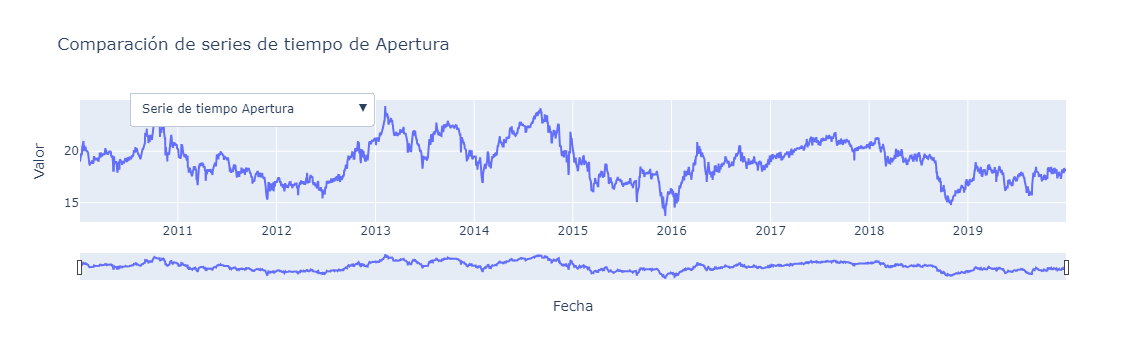

In [16]:
# Crear una figura de plotly
fig = go.Figure()

# Agregar cada línea al gráfico
fig.add_trace(go.Scatter(x=ARGOS['Fecha'], y=ARGOS['Apertura'], mode='lines', name='Serie de tiempo Apertura'))
fig.add_trace(go.Scatter(x=ARGOS['Fecha'], y=serie_boxcox, mode='lines', name='Serie de tiempo Apertura-BoxCox', visible=False))

# Actualizar el diseño del botón
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(label="Serie de tiempo Apertura",
                     method="update",
                     args=[{"visible": [True, False]},
                           {"title": "Serie de tiempo Apertura"}]),
                dict(label="Serie de tiempo Apertura-BoxCox",
                     method="update",
                     args=[{"visible": [False, True]},
                           {"title": "Serie de tiempo Apertura-BoxCox"}])
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.05,
            xanchor="left",
            y=1.15,
            yanchor="top"
        ),
    ]
)

# Actualizar el diseño del eje x
fig.update_xaxes(title_text='Fecha', rangeslider_visible=True)

# Actualizar el diseño del eje y
fig.update_yaxes(title_text='Valor')

# Actualizar el título del gráfico
fig.update_layout(title='Comparación de series de tiempo de Apertura')

# Mostrar el gráfico
fig.show()

A partir de este punto intentaremos mostrar los resultados para ambas series teniendo en cuenta los datos en su escala original y los datos en escala log, esto con la intencion de tener una comparacion más directa sobre lo que puede causar la tranformacion de los datos en los resultados de nuestro ejercicio.

In [17]:
original_data = ARGOS["Apertura"]

<h3 style="color: #011f4b;">DIFERENCIACION DE LA SERIE</h3>

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller

In [19]:
BoxCox = serie_boxcox

In [20]:
# Convertir la serie de tiempo a un DataFrame de pandas
df_BoxCox = pd.DataFrame({'Fecha': ARGOS['Fecha'], 'BoxCox': serie_boxcox})
df_BoxCox.set_index('Fecha', inplace=True)  # Establecer la columna 'Fecha' como el índice de tiempo

In [21]:
# AR Model para determinar autocorrelación
model_ar = AutoReg(BoxCox, lags=1)
results_ar = model_ar.fit()

# Coeficientes del modelo AR
print("Coeficiente del primer rezago (AR(1)):", results_ar.params[1])

# Prueba de Dickey-Fuller para determinar estacionariedad en la serie original
adf_result_orig = adfuller(BoxCox, maxlag=12, regression="c", autolag="AIC")
print("Resultado de la prueba de Dickey-Fuller para serie original:")
print("Estadístico ADF:", adf_result_orig[0])
print("Valor crítico al 1%:", adf_result_orig[4]['1%'])
print("Valor crítico al 5%:", adf_result_orig[4]['5%'])
print("Valor crítico al 10%:", adf_result_orig[4]['10%'])
print("Es estacionaria (p-valor):", adf_result_orig[1] < 0.05)

Coeficiente del primer rezago (AR(1)): 0.9913023479244938
Resultado de la prueba de Dickey-Fuller para serie original:
Estadístico ADF: -3.1844961312688524
Valor crítico al 1%: -3.4321497586963647
Valor crítico al 5%: -2.8623352330844547
Valor crítico al 10%: -2.5671933147833483
Es estacionaria (p-valor): True


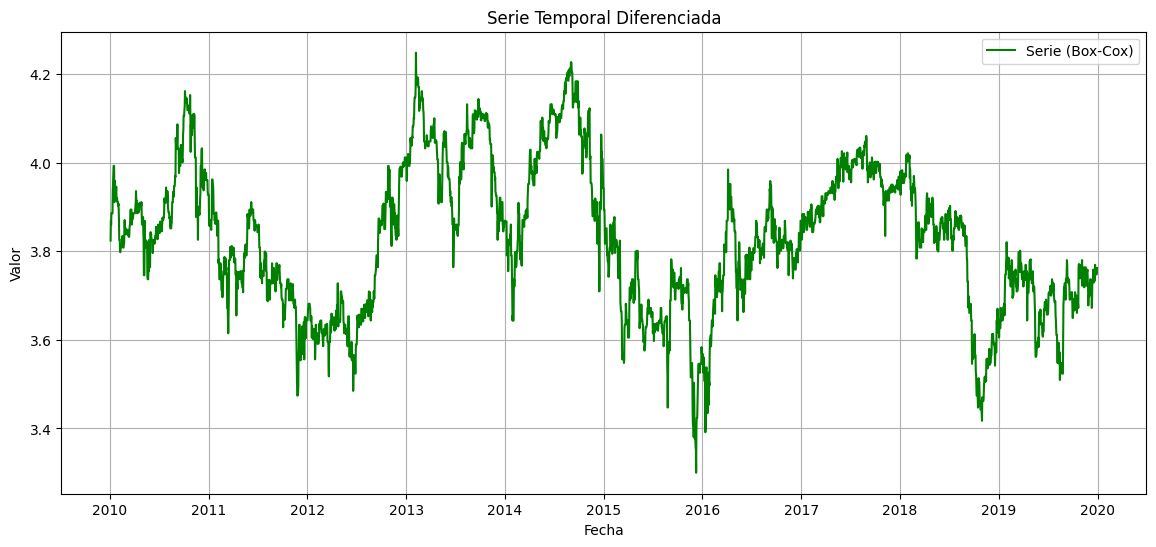

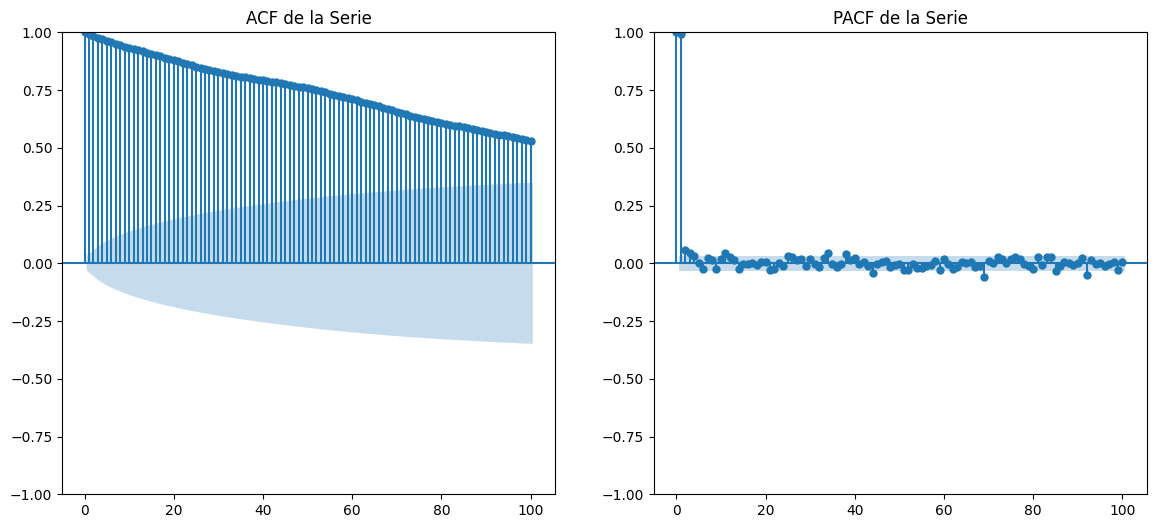

In [22]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Crear DataFrame para la serie diferenciada con la misma longitud que la serie original
diff_df = pd.DataFrame({'Fecha': ARGOS['Fecha'], 'BoxCox': BoxCox})

# Graficar la serie diferenciada
plt.figure(figsize=(14, 6))
plt.plot(diff_df['Fecha'], diff_df['BoxCox'], label='Serie (Box-Cox)', color='green')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Serie Temporal Diferenciada')
plt.legend()
plt.grid(True)
plt.show()

# Graficar ACF y PACF para la serie diferenciada
plt.figure(figsize=(14, 6))
plt.subplot(121)
plot_acf(BoxCox, lags=100, ax=plt.gca())
plt.title('ACF de la Serie')

plt.subplot(122)
plot_pacf(BoxCox, lags=100, method='ols', ax=plt.gca())
plt.title('PACF de la Serie')

plt.show()

In [23]:
# Serie Diferenciada
Diff_BoxCox = np.diff(BoxCox, n=1)

# AR Model para la serie diferenciada
model_ar_diff = AutoReg(Diff_BoxCox, lags=1)
results_ar_diff = model_ar_diff.fit()

# Prueba de Dickey-Fuller para determinar estacionariedad en la serie diferenciada
adf_result_diff = adfuller(Diff_BoxCox, maxlag=12, regression="c", autolag="AIC")
print("\nResultado de la prueba de Dickey-Fuller para serie diferenciada:")
print("Estadístico ADF:", adf_result_diff[0])
print("Valor crítico al 1%:", adf_result_diff[4]['1%'])
print("Valor crítico al 5%:", adf_result_diff[4]['5%'])
print("Valor crítico al 10%:", adf_result_diff[4]['10%'])
print("Es estacionaria (p-valor):", adf_result_diff[1] < 0.05)


Resultado de la prueba de Dickey-Fuller para serie diferenciada:
Estadístico ADF: -20.41941538842336
Valor crítico al 1%: -3.4321497586963647
Valor crítico al 5%: -2.8623352330844547
Valor crítico al 10%: -2.5671933147833483
Es estacionaria (p-valor): True


**Conclusión:**

Basándonos en estos resultados, podemos concluir con un alto grado de confianza que la serie diferenciada es estacionaria. Esto significa que:

- La serie no tiene una tendencia creciente o decreciente.
- La varianza de la serie es constante a lo largo del tiempo.
- La estructura de autocorrelación en la serie es constante a lo largo del tiempo.

**Implicaciones:**

- La diferenciación que se aplico a la serie original fue efectiva para convertirla en estacionaria.

**NOTA:** Para revertir las tranformaciones hechas hasta este punto se debe usar las siguientes funciones. 

```python
import numpy as np
from scipy.special import inv_boxcox

# Paso 1: Revertir la diferenciación
# Suponiendo que 'BoxCox' es la serie original antes de la diferenciación
reverted_diff = np.cumsum(np.insert(Diff_BoxCox, 0, BoxCox[0]))

# Paso 2: Revertir la transformación Box-Cox
# 'lmbda' es el parámetro de la transformación Box-Cox utilizada anteriormente
reverted_series = inv_boxcox(reverted_diff, lmbda)
```

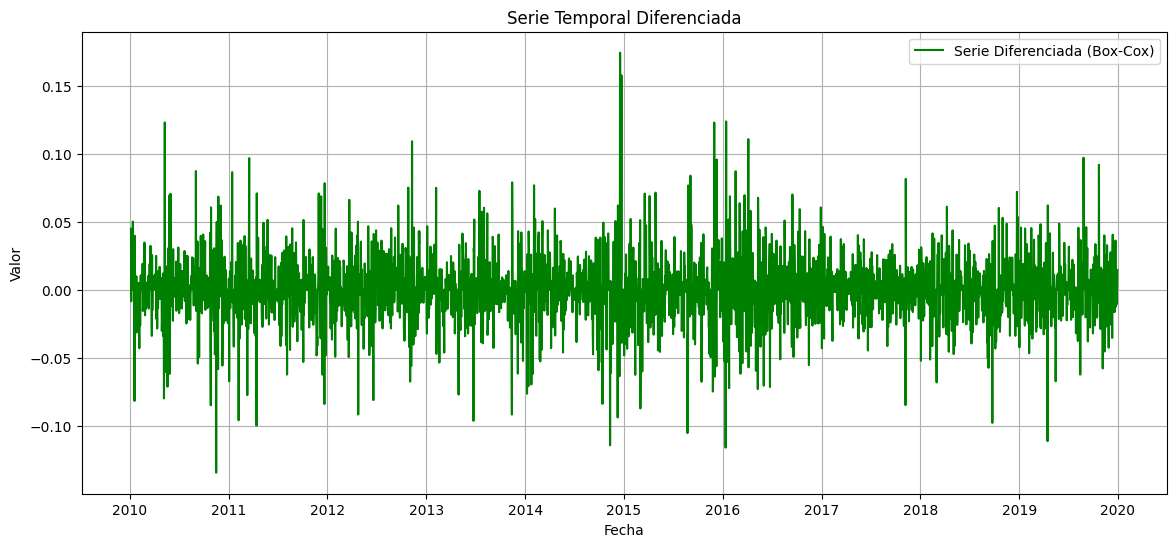

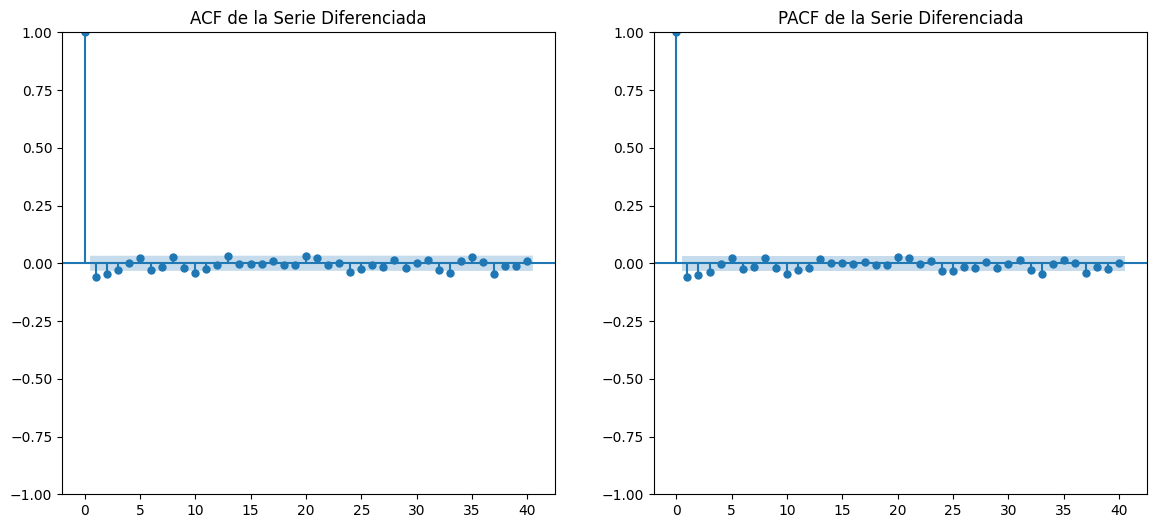

In [24]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Crear DataFrame para la serie diferenciada con la misma longitud que la serie original
diff2_df = pd.DataFrame({'Fecha': ARGOS['Fecha'][1:], 'Diff_BoxCox': Diff_BoxCox})

# Graficar la serie diferenciada
plt.figure(figsize=(14, 6))
plt.plot(diff2_df['Fecha'], diff2_df['Diff_BoxCox'], label='Serie Diferenciada (Box-Cox)', color='green')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Serie Temporal Diferenciada')
plt.legend()
plt.grid(True)
plt.show()

# Graficar ACF y PACF para la serie diferenciada
plt.figure(figsize=(14, 6))
plt.subplot(121)
plot_acf(Diff_BoxCox, lags=40, ax=plt.gca())
plt.title('ACF de la Serie Diferenciada')

plt.subplot(122)
plot_pacf(Diff_BoxCox, lags=40, method='ywm', ax=plt.gca())
plt.title('PACF de la Serie Diferenciada')

plt.show()

<h3 style="color: #011f4b;">INDICE DE INFORMAICON MUTUA (AMI) </h3>

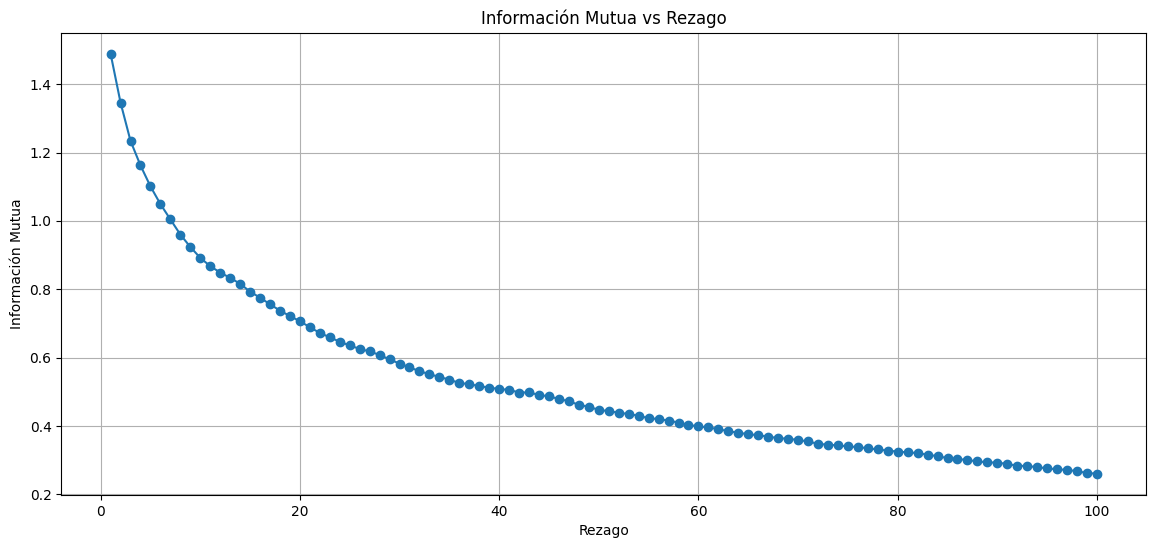

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy

# Función para calcular la información mutua
def mutual_information(x, y, bins=10):
    hist_xy, _, _ = np.histogram2d(x, y, bins=bins, density=True)
    hist_x, _ = np.histogram(x, bins=bins, density=True)
    hist_y, _ = np.histogram(y, bins=bins, density=True)
    
    entropy_xy = entropy(hist_xy.flatten())
    entropy_x = entropy(hist_x)
    entropy_y = entropy(hist_y)
    
    mi = entropy_x + entropy_y - entropy_xy
    return mi

# Calcular la información mutua para diferentes rezagos
lag_values = np.arange(1, 101)
mutual_info_values = [
    mutual_information(
        diff_df['BoxCox'].iloc[:-lag].values,  # Extraer solo la columna 'Diff_BoxCox'
        diff_df['BoxCox'].iloc[lag:].values
    ) for lag in lag_values
]

# Graficar la información mutua en función del rezago
plt.figure(figsize=(14, 6))
plt.plot(lag_values, mutual_info_values, marker='o', linestyle='-')
plt.title('Información Mutua vs Rezago')
plt.xlabel('Rezago')
plt.ylabel('Información Mutua')
plt.grid(True)
plt.show()

In [26]:
# Selección de rezagos con alta MI para modelado
high_mi_lags = [lag for lag, mi in zip(lag_values, mutual_info_values) if mi > np.mean(mutual_info_values)]
print(high_mi_lags)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]


Notamos que los rezagos semanales tienen una importancia superior en términos de MI para la serie, es decir, esto sugiere tomar aquellos rezagos en orden de 7 días, es decir, los rezagos 7 (Semanal), 14 (Quincenal), 21, 28 (Mensual), 35 y de esa manera consecutivamente. 

<h3 style="color: #011f4b;">DETECCION DE ESTACIONALIDAD</h3>

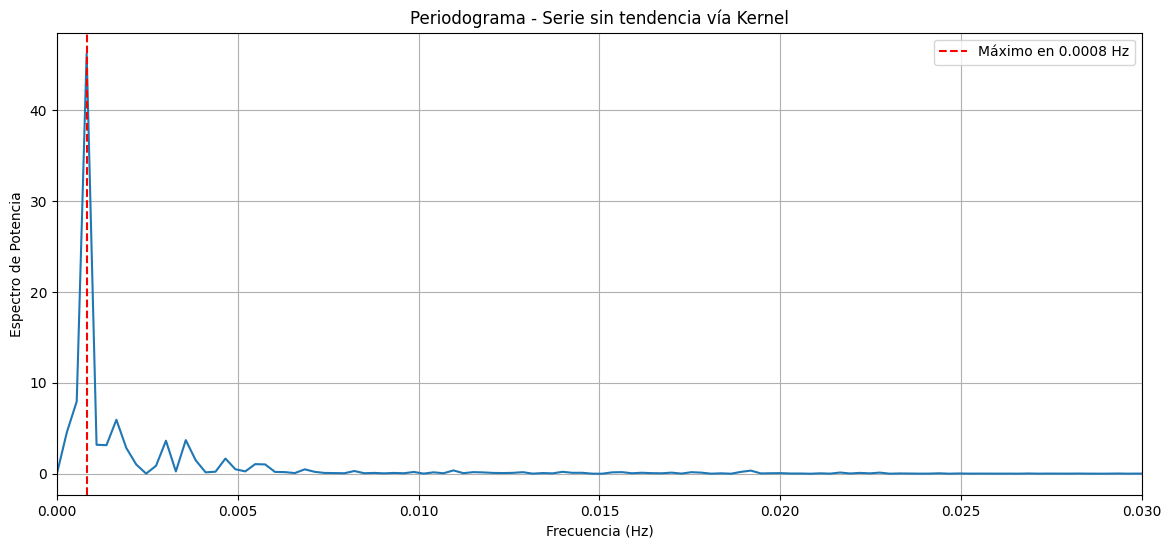

Frecuencia dominante: 0.00
Periodo dominante: 1216.00 unidades de tiempo


In [27]:
from scipy.signal import periodogram

# Calcular el periodograma (espectro de potencia) de la serie diferenciada
frequencies, spectrum = periodogram(diff_df['BoxCox'])

# Encontrar la frecuencia correspondiente al máximo del espectro
max_frequency = frequencies[np.argmax(spectrum)]
periodo = 1 / max_frequency

# Graficar el periodograma
plt.figure(figsize=(14, 6))
plt.plot(frequencies, spectrum)
plt.axvline(max_frequency, color='red', linestyle='--', label=f'Máximo en {max_frequency:.4f} Hz')
plt.xlim([0.0,0.03])
plt.title('Periodograma - Serie sin tendencia vía Kernel')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Espectro de Potencia')
plt.legend()
plt.grid(True)
plt.show()

# Calcular el periodo correspondiente a la frecuencia máxima
print(f'Frecuencia dominante: {max_frequency:.2f}')
print(f'Periodo dominante: {periodo:.2f} unidades de tiempo')

Esto indica que la serie sin tendencia tiene un ciclo dominante que se repite aproximadamente cada 7 unidades de tiempo. Como nuestros datos están en días, esto sugiere una periodicidad de aproximadamente 7 días o dicho de una forma más general la serie posee un ciclo dominante de 7 días.

**IMPORTANTE** - LA CONCLUSION QUE SE DIO NO SOLO SE BASA EN ESTE PEQUEÑO ANALISIS QUE SE MUESTRA EN ESTA PRIMERA PARTE DEL SCRIPT SINO TAMBIEN EN TODO EL ANALISIS DESCRIPTIVO DE LA SERIE QUE SE PRESENTO EN EL SCRIPT [Argos_Exploracion.ipynb] SI SE TIENE ALGUNA DUDA DE LOS METODOS O LA ELECCION DE LOS REZAGOS POR FAVOR MIRAR EL DESARROLLO PROPUESTO EN ESE SCRIPT 

<center><h1 style="color: #011f4b;">ÁRBOLES DE DEDICIÓN SERIE ORIGINAL</h1></center>

Para esta seccion nos proponemos a realizar el analisis a partir de la metodologia de "Arboles de decision" la cual en el contexto de series de temporales nos permiten tener las siguiente herramientas para el analisis: 

- Prediccion de tendencia futuras: Los árboles de decisión pueden ayudar a identificar relaciones complejas entre variables y predecir cómo evolucionará una serie temporal en el futuro.
- Modelado de dependencias temporales: Las series de tiempo suelen estar influenciadas por eventos pasados y tendencias históricas. Los árboles de decisión pueden manejar estas dependencias temporales al considerar múltiples puntos de tiempo como características de entrada.
- Flexibilidad en el tratamiento de datos no lineales: Las series de tiempo pueden exhibir comportamientos no lineales y cambios abruptos. Los árboles de decisión son capaces de modelar relaciones no lineales y segmentar el espacio de características de manera adaptativa.

<h2 style="color: #011f4b;">PREPARACION DE LA SERIE</h2>

In [ ]:
pip install lightgbm

In [29]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [30]:
# Construcción del árbol de decisión
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor

# Tuning del árbol
from skforecast.ForecasterAutoreg import ForecasterAutoreg

# Medidas de precisión
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Para el ajuste de hiperparámetros
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

# Para mostrar la estructura del árbol
from sklearn.tree import plot_tree

# Escalado de los datos:
from sklearn.preprocessing import MinMaxScaler

In [205]:
# Seleccionar las columnas 'Fecha' y 'Apertura' del DataFrame ARGOS
Serie = ARGOS[['Fecha', 'Apertura']]
Serie.size

7296

In [242]:
diff_df

Fecha    BoxCox
0    2010-01-04  3.824025
1    2010-01-05  3.868802
2    2010-01-06  3.860269
3    2010-01-07  3.885761
4    2010-01-08  3.885761
...         ...       ...
3643 2019-12-26  3.758517
3644 2019-12-27  3.747687
3645 2019-12-28  3.747687
3646 2019-12-29  3.747687
3647 2019-12-30  3.762114

[3648 rows x 2 columns]

In [243]:
SerieTs = pd.Series(diff_df['BoxCox'].values, index = diff_df['Fecha'])
SerieDf = pd.DataFrame(diff_df['BoxCox'].values, index = diff_df['Fecha'])
type(SerieTs)
SerieTs.info()
print(SerieTs)
#type(SerieDf)

<class 'pandas.core.series.Series'>
DatetimeIndex: 3648 entries, 2010-01-04 to 2019-12-30
Series name: None
Non-Null Count  Dtype  
--------------  -----  
3648 non-null   float64
dtypes: float64(1)
memory usage: 57.0 KB
Fecha
2010-01-04    3.824025
2010-01-05    3.868802
2010-01-06    3.860269
2010-01-07    3.885761
2010-01-08    3.885761
                ...   
2019-12-26    3.758517
2019-12-27    3.747687
2019-12-28    3.747687
2019-12-29    3.747687
2019-12-30    3.762114
Length: 3648, dtype: float64


In [312]:
print('Complete Observations for Target after Supervised configuration: %d' %len(SerieTs))
traintarget_size = int(len(SerieTs) * 0.70) 
valtarget_size = int(len(SerieTs) * 0.20)# Set split
testtarget_size = int(len(SerieTs) * 0.10)# Set split
print(traintarget_size,valtarget_size,testtarget_size)
print('Train + Validation + Test: %d' %(traintarget_size+valtarget_size+testtarget_size))

Complete Observations for Target after Supervised configuration: 3648
2553 729 364
Train + Validation + Test: 3646


In [313]:
traintarget_size = int(len(SerieTs) * 0.70) 
valtarget_size = int(len(SerieTs) * 0.20)+1# Set split
testtarget_size = int(len(SerieTs) * 0.10)# Set split
train_target, val_target,test_target = SerieTs[0:traintarget_size],SerieTs[(traintarget_size):(traintarget_size+valtarget_size)] ,SerieTs[(traintarget_size+valtarget_size):len(SerieTs)]

print('Observations for Target: %d' % (len(Serie)))
print('Training Observations for Target: %d' % (len(train_target)))
print('Validation Observations for Target: %d' % (len(val_target)))
print('Test Observations for Target: %d' % (len(test_target)))

Observations for Target: 3648
Training Observations for Target: 2553
Validation Observations for Target: 730
Test Observations for Target: 365


In [314]:
trainfeature_size = int(len(SerieTs) * 0.70)
valfeature_size = int(len(SerieTs) * 0.20)+1# Set split
testfeature_size = int(len(SerieTs) * 0.10)# Set split
train_feature, val_feature,test_feature = SerieTs[0:traintarget_size],SerieTs[(traintarget_size):(traintarget_size+valtarget_size)],SerieTs[(traintarget_size+valtarget_size):len(SerieTs)]

print('Observations for Feature: %d' % (len(SerieTs)))
print('Training Observations for Feature: %d' % (len(train_feature)))
print('Validation Observations for Feature: %d' % (len(val_feature)))
print('Test Observations for Feature: %d' % (len(test_feature)))

Observations for Feature: 3648
Training Observations for Feature: 2553
Validation Observations for Feature: 730
Test Observations for Feature: 365


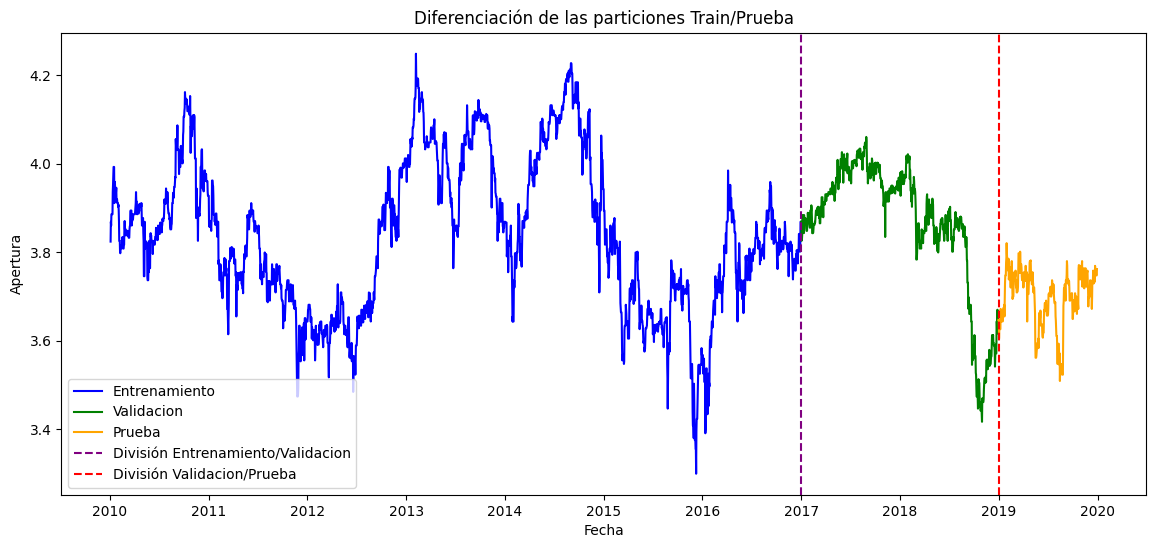

In [315]:
import matplotlib.pyplot as plt
import pandas as pd

# Crear la gráfica
plt.figure(figsize=(14, 6))

# Graficar los datos de entrenamiento
plt.plot(train_feature.index, train_feature, label='Entrenamiento', color='blue')

# Graficar los datos de Validacion
plt.plot(val_feature.index, val_feature, label='Validacion', color='green')

# Graficar los datos de prueba
plt.plot(test_feature.index, test_feature, label='Prueba', color='orange')

# Añadir líneas verticales para separar los conjuntos
split_date_val = val_feature.index[0]
plt.axvline(x=split_date_val, color='purple', linestyle='--', label='División Entrenamiento/Validacion')
split_date_test = test_feature.index[0]
plt.axvline(x=split_date_test, color='red', linestyle='--', label='División Validacion/Prueba')

# Configurar el título y las etiquetas
plt.title('Diferenciación de las particiones Train/Prueba')
plt.xlabel('Fecha')
plt.ylabel('Apertura')

# Añadir leyenda
plt.legend()

# Mostrar la gráfica
plt.show()


Como observamos en el grafico anterior vamos a tomar un total del $70\%$ para el conjunto de entrenamiento, un $10\%$ para el conjunto de validacion y otro $20\%$ para el conjunto de prueba. 

In [316]:
if isinstance(train_feature, pd.Series):
    train_feature = train_feature.to_frame()

if isinstance(val_feature, pd.Series):
    val_feature = val_feature.to_frame()

if isinstance(test_feature, pd.Series):
    test_feature = test_feature.to_frame()

In [317]:
if not isinstance(train_target, pd.Series):
    train_target = pd.Series(train_target)

if not isinstance(val_target, pd.Series):
    val_target = pd.Series(val_target)

if not isinstance(test_target, pd.Series):
    test_target = pd.Series(test_target)

In [318]:
print("Dimensiones de train_feature:", train_feature.shape)
print("Dimensiones de train_target:", train_target.shape)

Dimensiones de train_feature: (2553, 1)
Dimensiones de train_target: (2553,)


<h2 style="color: #011f4b;">PROBANDO UN ARBOL SENCILLO CON DecisionTreeRegressor</h2> 

In [319]:
from sklearn.tree import DecisionTreeRegressor

DT_Apertura = DecisionTreeRegressor() 
DT_Apertura.fit(train_feature, train_target)

# Check the score on train and test
print("Coeficiente R2 sobre el conjunto de entrenamiento:",DT_Apertura.score(train_feature, train_target))
print("Coeficiente R2 sobre el conjunto de Validación:",DT_Apertura.score(val_feature,val_target))
print("el RECM sobre validación es:",(((DT_Apertura.predict(val_feature)-val_target)**2).mean()) )

Coeficiente R2 sobre el conjunto de entrenamiento: 1.0
Coeficiente R2 sobre el conjunto de Validación: 0.9999820141368503
el RECM sobre validación es: 3.908326484965135e-07


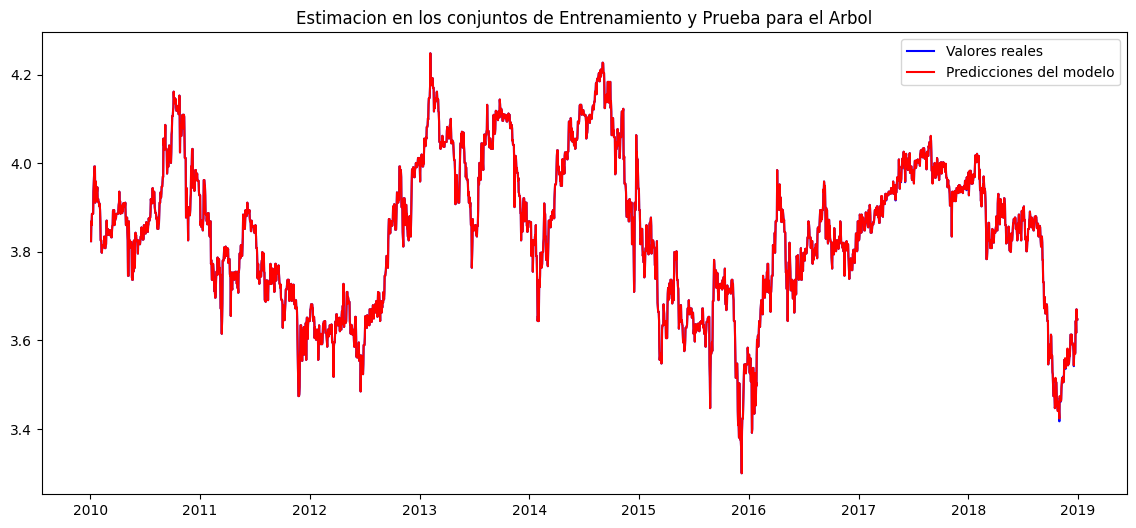

In [320]:
val_predictions = DT_Apertura.predict(np.concatenate([train_feature,val_feature]))

plt.figure(figsize=(14, 6))
plt.plot(np.concatenate([train_feature.index, val_feature.index]), np.concatenate([train_feature,val_feature]), label='Valores reales',color='blue')
plt.plot(np.concatenate([train_feature.index, val_feature.index]), val_predictions, label='Predicciones del modelo', color='red')
plt.title('Estimacion en los conjuntos de Entrenamiento y Prueba para el Arbol')
plt.legend()
plt.show()

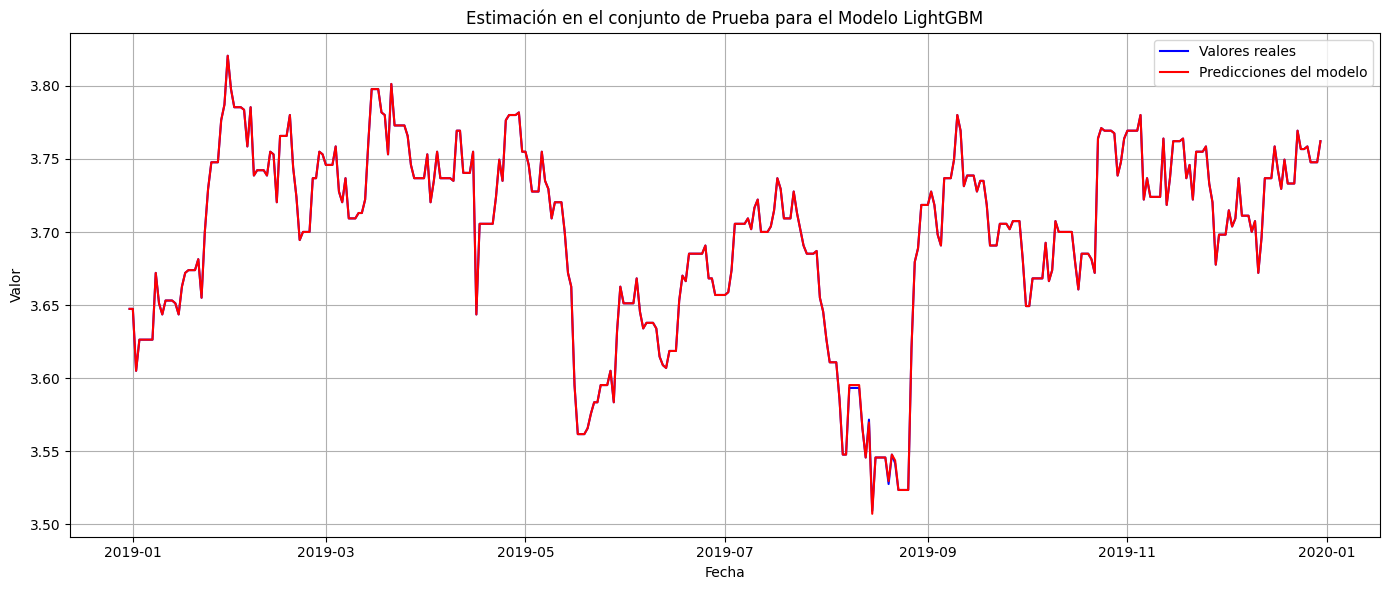

In [321]:
# Make predictions on the test set
test_predictions = DT_Apertura.predict(test_feature)

# Create the plot
plt.figure(figsize=(14, 6))
plt.plot(test_feature.index, test_target, label='Valores reales', color='blue')
plt.plot(test_feature.index, test_predictions, label='Predicciones del modelo', color='red')
plt.title('Estimación en el conjunto de Prueba para el Modelo LightGBM')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<h2 style="color: #011f4b;">PROBANDO UN ARBOL SENCILLO CON LGBMRegressor()</h2> 

In [322]:
from sklearn.tree import DecisionTreeRegressor

DT_Apertura = LGBMRegressor() 
DT_Apertura.fit(train_feature, train_target)

# Check the score on train and test
print("Coeficiente R2 sobre el conjunto de entrenamiento:",DT_Apertura.score(train_feature, train_target))
print("Coeficiente R2 sobre el conjunto de Validación:",DT_Apertura.score(val_feature,val_target))
print("el RECM sobre validación es:",(((DT_Apertura.predict(val_feature)-val_target)**2).mean()) )

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000054 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 240
[LightGBM] [Info] Number of data points in the train set: 2553, number of used features: 1
[LightGBM] [Info] Start training from score 3.836893
Coeficiente R2 sobre el conjunto de entrenamiento: 0.9995751476273055
Coeficiente R2 sobre el conjunto de Validación: 0.9988010631887945
el RECM sobre validación es: 2.605288639216094e-05


In [323]:
val_feature.index

DatetimeIndex(['2016-12-31', '2017-01-01', '2017-01-02', '2017-01-03',
               '2017-01-04', '2017-01-05', '2017-01-06', '2017-01-07',
               '2017-01-08', '2017-01-09',
               ...
               '2018-12-21', '2018-12-22', '2018-12-23', '2018-12-24',
               '2018-12-25', '2018-12-26', '2018-12-27', '2018-12-28',
               '2018-12-29', '2018-12-30'],
              dtype='datetime64[ns]', name='Fecha', length=730, freq=None)

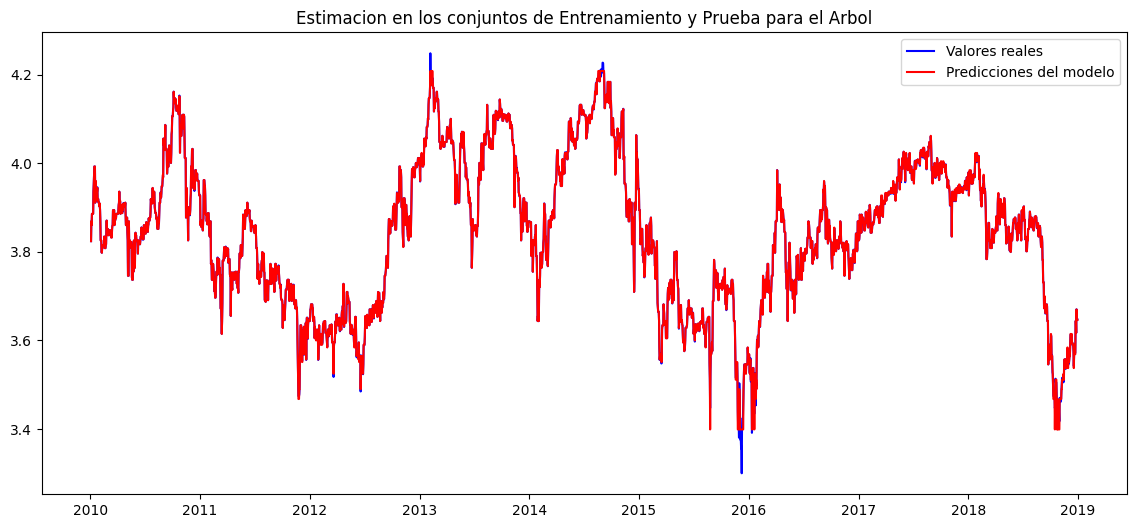

In [324]:
val_predictions = DT_Apertura.predict(np.concatenate([train_feature,val_feature]))

plt.figure(figsize=(14, 6))
plt.plot(np.concatenate([train_feature.index, val_feature.index]), np.concatenate([train_feature,val_feature]), label='Valores reales',color='blue')
plt.plot(np.concatenate([train_feature.index, val_feature.index]), val_predictions, label='Predicciones del modelo', color='red')
plt.title('Estimacion en los conjuntos de Entrenamiento y Prueba para el Arbol')
plt.legend()
plt.show()

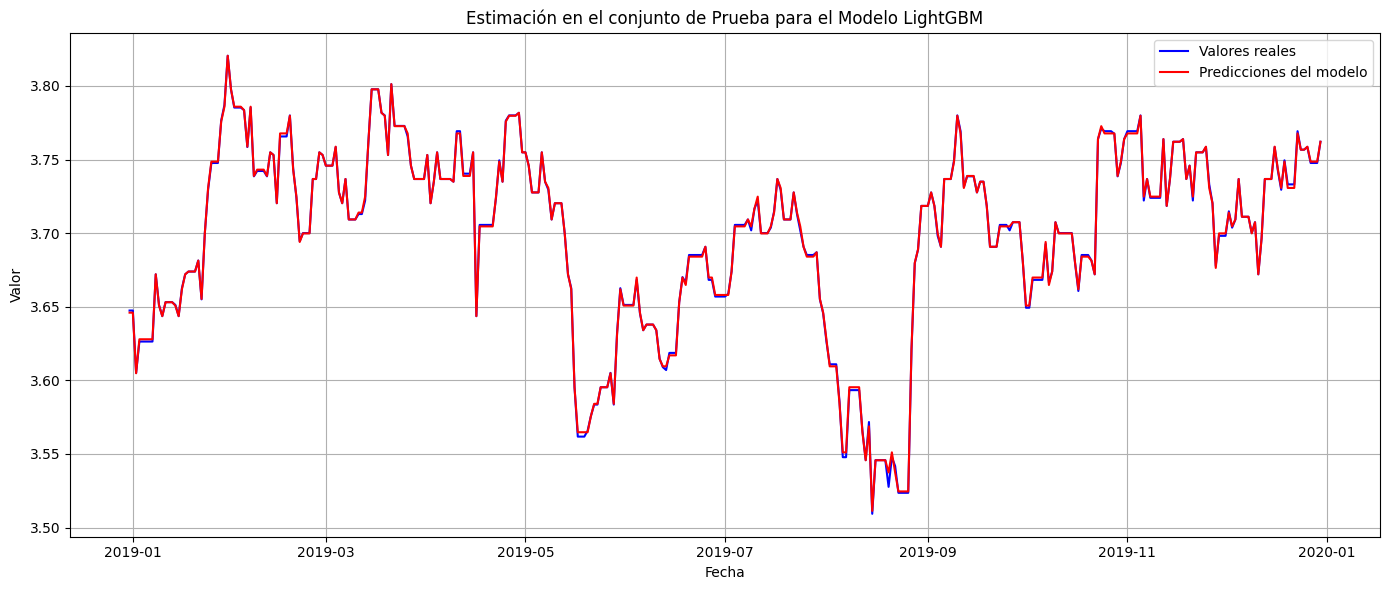

In [325]:
# Make predictions on the test set
test_predictions = DT_Apertura.predict(test_feature)

# Create the plot
plt.figure(figsize=(14, 6))
plt.plot(test_feature.index, test_target, label='Valores reales', color='blue')
plt.plot(test_feature.index, test_predictions, label='Predicciones del modelo', color='red')
plt.title('Estimación en el conjunto de Prueba para el Modelo LightGBM')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<h2 style="color: #011f4b;">CONFIGURACION DE LA GRILLA PARA ENCONTRAR EL MEJOR ARBOL</h2> 

Tenenemos una baga idea de los rezagos que pueden ser elegido para la tarea de entrenar el árbol de decisión por tanto no disponemos a realizar el entrenamiento del arbol de la siguiennte manera: 
 
 - Nos gusta más la idea de usar LGBMRegressor, pero se hicieron pruebas de tiempo, y en 8 horas no pudo correr la mitad los modelos de una grilla pequeña, por lo se plantea utilizar DecissionTreeRegressor en su lugar.  
 - Para la eleccion de los rezagos no tiene mucho sentido pesar en una periodicidad semanal, pero al hacer el análisis del periodo nos encontramos con que el periodo es de 1216 unidades de tiempo lo cual equivale a 3.3 años por lo tanto usaremos ese periodo y trateremos de incluir algunos otros rezagos que pueden resultar utiles basandonos en los demas análisis de periodicidad
     - [1]: El primer rezago, que es crucial según el PACF.
     - [365]: El rezago anual, basado en el patrón estacional y el análisis de Fourier.
     - [1, 365]: Combinación del rezago diario y anual.
     - [1, 2, 365, 728, 1216]: Incluimos el periodo dominante del periodograma.
     - [1, 2, 303, 365, 728, 1216, 1822]: Añadimos el periodo más fuerte del análisis de Fourier (1822) y el ciclo de 10 meses (303).
     - [1, 2, 228, 303, 365, 728, 1216, 1822]: Finalmente, incluimos el ciclo de 7.5 meses (228) del análisis de Fourier.

In [326]:
rezagos = [1, 2, [1, 2, 182, 365], 365, 730,
           182, [1, 2, 365, 728, 1216],
           [1, 2, 365, 728, 1216, 1822]
          ]

# Definir los hiperparámetros para la búsqueda
hiperparametros = {
    'max_depth': list(range(4, 12)),
    'min_samples_leaf': list(range(5, 15)),
    'ccp_alpha': [0.0, 0.01]
}

In [327]:
DT_Apertura = ForecasterAutoreg(
    regressor = DecisionTreeRegressor(random_state=123),
    lags = 1
)

In [328]:
train_feature_series = train_feature.squeeze()  # Squeeze the DataFrame to a Series
print(train_feature_series.head(5))
val_feature_series = val_feature.squeeze()  # Squeeze the DataFrame to a Series
print(val_feature_series.head(5))

Fecha
2010-01-04    3.824025
2010-01-05    3.868802
2010-01-06    3.860269
2010-01-07    3.885761
2010-01-08    3.885761
Name: 0, dtype: float64
Fecha
2016-12-31    3.868802
2017-01-01    3.868802
2017-01-02    3.825766
2017-01-03    3.827505
2017-01-04    3.837910
Name: 0, dtype: float64


In [329]:
TrainVal_Feature = np.concatenate([train_feature_series,val_feature_series])

if not isinstance(TrainVal_Feature, pd.Series):
    TrainVal_Feature = pd.Series(TrainVal_Feature)

TrainVal_Feature

0       3.824025
1       3.868802
2       3.860269
3       3.885761
4       3.885761
          ...   
3278    3.616730
3279    3.670166
3280    3.647443
3281    3.647443
3282    3.647443
Length: 3283, dtype: float64

In [330]:
import os
import multiprocessing


num_processors = os.cpu_count()
print(f"Número de procesadores: {num_processors}")
n_jobs = multiprocessing.cpu_count() - 4

Número de procesadores: 8


In [332]:
# Realizar la búsqueda de hiperparámetros usando solo los conjuntos de entrenamiento y validación
tuning = grid_search_forecaster(
    forecaster=DT_Apertura,
    y=TrainVal_Feature,  # Subconjunto de datos con índices de fecha
    param_grid=hiperparametros,
    lags_grid=rezagos,
    steps= 365,
    metric='mean_squared_error',
    initial_train_size=int(len(TrainVal_Feature) * 0.8),
    fixed_train_size=False,
    return_best=True,
    verbose=False,
    show_progress=True,
    n_jobs=n_jobs  # Añadimos el parámetro n_jobs para paralelización
)

Number of models compared: 1280.


lags grid:   0%|          | 0/8 [00:00<?, ?it/s]

params grid:   0%|          | 0/160 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [   1    2  365  728 1216] 
  Parameters: {'ccp_alpha': 0.0, 'max_depth': 10, 'min_samples_leaf': 7}
  Backtesting metric: 0.01016370589723887



In [333]:
tuning = tuning.sort_values(by = ['mean_squared_error', 'max_depth', 'min_samples_leaf'])
tuning

lags                    lags_label  \
1022        [1, 2, 365, 728, 1216]        [1, 2, 365, 728, 1216]   
1032        [1, 2, 365, 728, 1216]        [1, 2, 365, 728, 1216]   
1030        [1, 2, 365, 728, 1216]        [1, 2, 365, 728, 1216]   
1020        [1, 2, 365, 728, 1216]        [1, 2, 365, 728, 1216]   
1021        [1, 2, 365, 728, 1216]        [1, 2, 365, 728, 1216]   
...                            ...                           ...   
1275  [1, 2, 365, 728, 1216, 1822]  [1, 2, 365, 728, 1216, 1822]   
1276  [1, 2, 365, 728, 1216, 1822]  [1, 2, 365, 728, 1216, 1822]   
1277  [1, 2, 365, 728, 1216, 1822]  [1, 2, 365, 728, 1216, 1822]   
1278  [1, 2, 365, 728, 1216, 1822]  [1, 2, 365, 728, 1216, 1822]   
1279  [1, 2, 365, 728, 1216, 1822]  [1, 2, 365, 728, 1216, 1822]   

                                                 params  mean_squared_error  \
1022  {'ccp_alpha': 0.0, 'max_depth': 10, 'min_sampl...            0.010164   
1032  {'ccp_alpha': 0.0, 'max_depth': 11, 'min_sampl...            0.010217   
1030  {'ccp_alpha': 0.0, 'max_depth': 11, 'min_sampl...            0.010291   
1020  {'ccp_alpha': 0.0, 'max_depth': 10, 'min_sampl...            0.010353   
1021  {'ccp_alpha': 0.0, 'max_depth': 10, 'min_sampl...            0.010395   
...                                                 ...                 ...   
1275  {'ccp_alpha': 0.01, 'max_depth': 11, 'min_samp...            0.040164   
1276  {'ccp_alpha': 0.01, 'max_depth': 11, 'min_samp...            0.040164   
1277  {'ccp_alpha': 0.01, 'max_depth': 11, 'min_samp...            0.040164   
1278  {'ccp_alpha': 0.01, 'max_depth': 11, 'min_samp...            0.040164   
1279  {'ccp_alpha': 0.01, 'max_depth': 11, 'min_samp...            0.040164   

      ccp_alpha  max_depth  min_samples_leaf  
1022       0.00       10.0               7.0  
1032       0.00       11.0               7.0  
1030       0.00       11.0               5.0  
1020       0.00       10.0               5.0  
1021       0.00       10.0               6.0  
...         ...        ...               ...  
1275       0.01       11.0              10.0  
1276       0.01       11.0              11.0  
1277       0.01       11.0              12.0  
1278       0.01       11.0              13.0  
1279       0.01       11.0              14.0  

[1280 rows x 7 columns]

In [334]:
tuning = tuning[0:1]
tuning['model'] = 'decission tree'
tuning

lags              lags_label  \
1022  [1, 2, 365, 728, 1216]  [1, 2, 365, 728, 1216]   

                                                 params  mean_squared_error  \
1022  {'ccp_alpha': 0.0, 'max_depth': 10, 'min_sampl...            0.010164   

      ccp_alpha  max_depth  min_samples_leaf           model  
1022        0.0       10.0               7.0  decission tree

matplotlib.font_manager INFO  Fontsize 0.73 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
matplotlib.font_manager INFO  Fontsize 0.73 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
matplotlib.font_manager INFO  Fontsize 0.73 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
matplotlib.font_manager INFO  Fontsize 0.73 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
matplotlib.font_manager INFO  Fontsize 0.73 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
matplotlib.font_manager INFO  Fontsize 0.73 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
matplotlib.font_manager INFO  Fontsize 0.73 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
matplotlib.font_manager INFO  Fontsize 0.73 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
matplotlib.font_manager INFO  Fontsize 0.73 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
matplotlib.font_manager INFO  Fontsize 0.73 < 1.0 pt not allowed by FreeType. Sett

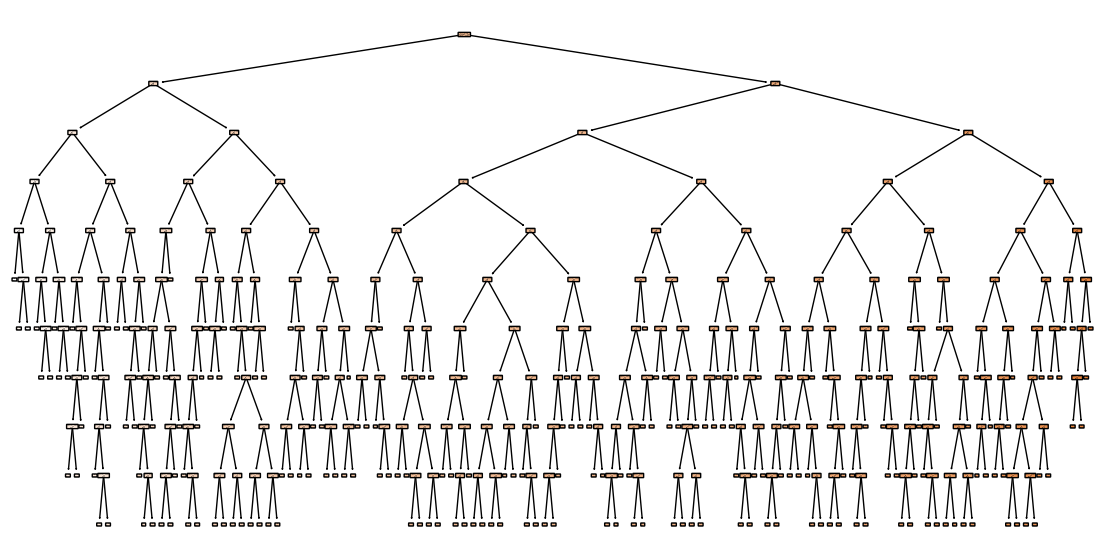

In [335]:
# Crear una visualización del árbol
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Crear una visualización del árbol
plt.figure(figsize=(14,7))
plot_tree(DT_Apertura.regressor,
          filled=True, feature_names=DT_Apertura.lags, rounded=True,
          impurity=False, label='root')
plt.show()

In [336]:
DT_Apertura.get_feature_importances()['importance']

0    0.995470
4    0.001456
2    0.001361
3    0.001012
1    0.000702
Name: importance, dtype: float64

In [338]:
DT_Apertura = ForecasterAutoreg(
    regressor = DecisionTreeRegressor(max_depth=10, min_samples_leaf=7),
    lags = [1, 2, 365, 728, 1216]
)
DT_Apertura.fit(TrainVal_Feature)

In [339]:
DT_Apertura

ForecasterAutoreg 
Regressor: DecisionTreeRegressor(max_depth=10, min_samples_leaf=7) 
Lags: [   1    2  365  728 1216] 
Transformer for y: None 
Transformer for exog: None 
Window size: 1216 
Weight function included: False 
Differentiation order: None 
Exogenous included: False 
Exogenous variables names: None 
Training range: [0, 3282] 
Training index type: RangeIndex 
Training index frequency: 1 
Regressor parameters: {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 7, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'} 
fit_kwargs: {} 
Creation date: 2024-09-04 14:21:43 
Last fit date: 2024-09-04 14:21:43 
Skforecast version: 0.13.0 
Python version: 3.12.4 
Forecaster id: None 

In [340]:
# Concatenar los índices de train_feature y val_feature
new_index = np.concatenate([train_feature.index, val_feature.index])

# Asignar el nuevo índice a TrainVal_Feature
TrainVal_Feature.index = new_index

# Asegurarse de que el índice esté ordenado
TrainVal_Feature.sort_index(inplace=True)

# Mostrar los primeros registros para verificar
print(TrainVal_Feature.head())

# Mostrar información sobre el DataFrame
print(TrainVal_Feature.info())

2010-01-04    3.824025
2010-01-05    3.868802
2010-01-06    3.860269
2010-01-07    3.885761
2010-01-08    3.885761
dtype: float64
<class 'pandas.core.series.Series'>
DatetimeIndex: 3283 entries, 2010-01-04 to 2018-12-30
Series name: None
Non-Null Count  Dtype  
--------------  -----  
3283 non-null   float64
dtypes: float64(1)
memory usage: 51.3 KB
None


In [341]:
print(TrainVal_Feature.head(5))
print(test_feature.head(5))

2010-01-04    3.824025
2010-01-05    3.868802
2010-01-06    3.860269
2010-01-07    3.885761
2010-01-08    3.885761
dtype: float64
                   0
Fecha               
2018-12-31  3.647443
2019-01-01  3.647443
2019-01-02  3.605087
2019-01-03  3.626380
2019-01-04  3.626380


In [342]:
n_steps = 365
test_prediction = DT_Apertura.predict(steps=n_steps)

In [343]:
# Evaluar el rendimiento de las predicciones
# test_target: serie temporal con los valores reales de prueba
test_target = test_feature

test_rmse = mean_squared_error(test_target, test_prediction, squared=False)
print("Predicciones para el conjunto de prueba:", test_prediction)
print("Raíz del Error Cuadrático Medio (RMSE) - Prueba:", test_rmse)

Predicciones para el conjunto de prueba: 3283    3.654757
3284    3.654757
3285    3.613618
3286    3.607441
3287    3.592759
          ...   
3643    3.486796
3644    3.486796
3645    3.486796
3646    3.486796
3647    3.486796
Name: pred, Length: 365, dtype: float64
Raíz del Error Cuadrático Medio (RMSE) - Prueba: 0.19376012746238214


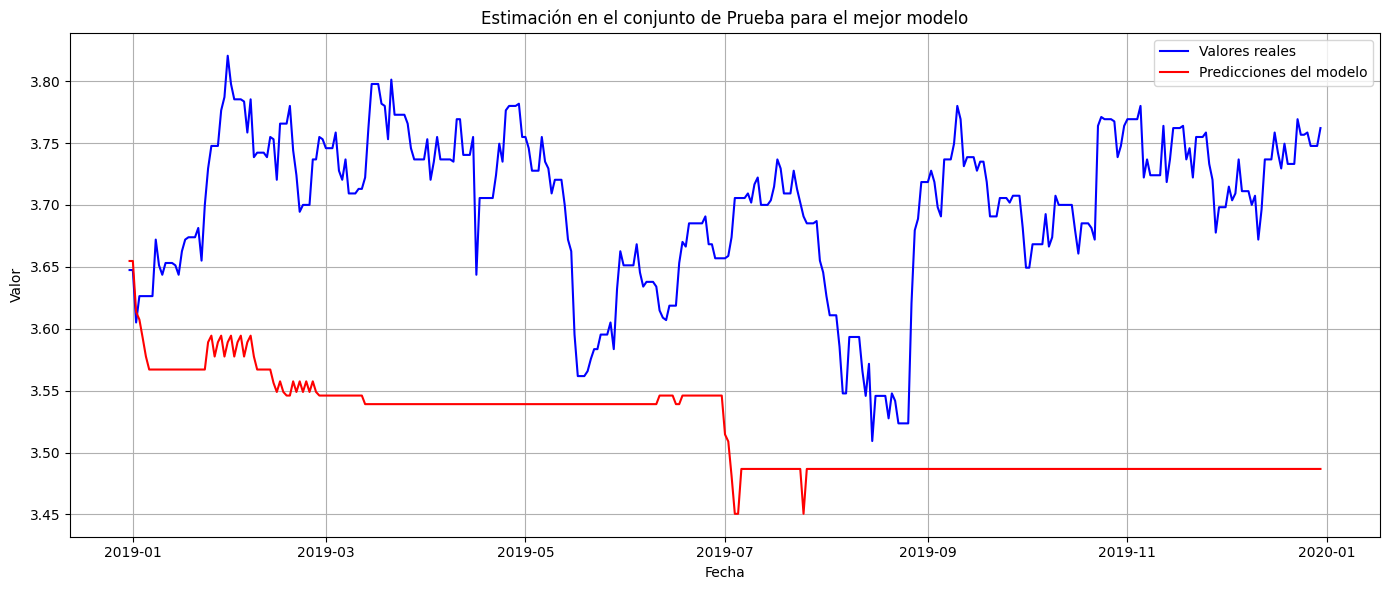

In [344]:
# Create the plot
plt.figure(figsize=(14, 6))
plt.plot(test_feature.index, test_target, label='Valores reales', color='blue')
plt.plot(test_feature.index, test_prediction, label='Predicciones del modelo', color='red')
plt.title('Estimación en el conjunto de Prueba para el mejor modelo')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [345]:
MSE = mean_squared_error(y_true= test_target, y_pred=test_prediction)

tuning['MSE test'] =  MSE
tuning

lags              lags_label  \
1022  [1, 2, 365, 728, 1216]  [1, 2, 365, 728, 1216]   

                                                 params  mean_squared_error  \
1022  {'ccp_alpha': 0.0, 'max_depth': 10, 'min_sampl...            0.010164   

      ccp_alpha  max_depth  min_samples_leaf           model  MSE test  
1022        0.0       10.0               7.0  decission tree  0.037543

In [346]:
# Prediction intervals

predictions = DT_Apertura.predict_interval(
                    steps    = 365,
                    interval = [5, 95],
                    n_boot   = 1000
              )

# Add datetime index to predictions
#predictions = pd.DataFrame(data=predictions, index=test_target.index)
predictions.head()

pred  lower_bound  upper_bound
3283  3.654757     3.624671     3.680780
3284  3.654757     3.606194     3.690858
3285  3.613618     3.579360     3.701471
3286  3.607441     3.559695     3.709164
3287  3.592759     3.554269     3.708551

In [347]:
# Crear DataFrame con predicciones, usando directamente el índice de test_target
predictions_df = pd.DataFrame(data=predictions)
predictions_df.index = test_target.index

print(predictions_df.head())

                pred  lower_bound  upper_bound
Fecha                                         
2018-12-31  3.654757     3.624671     3.680780
2019-01-01  3.654757     3.606194     3.690858
2019-01-02  3.613618     3.579360     3.701471
2019-01-03  3.607441     3.559695     3.709164
2019-01-04  3.592759     3.554269     3.708551


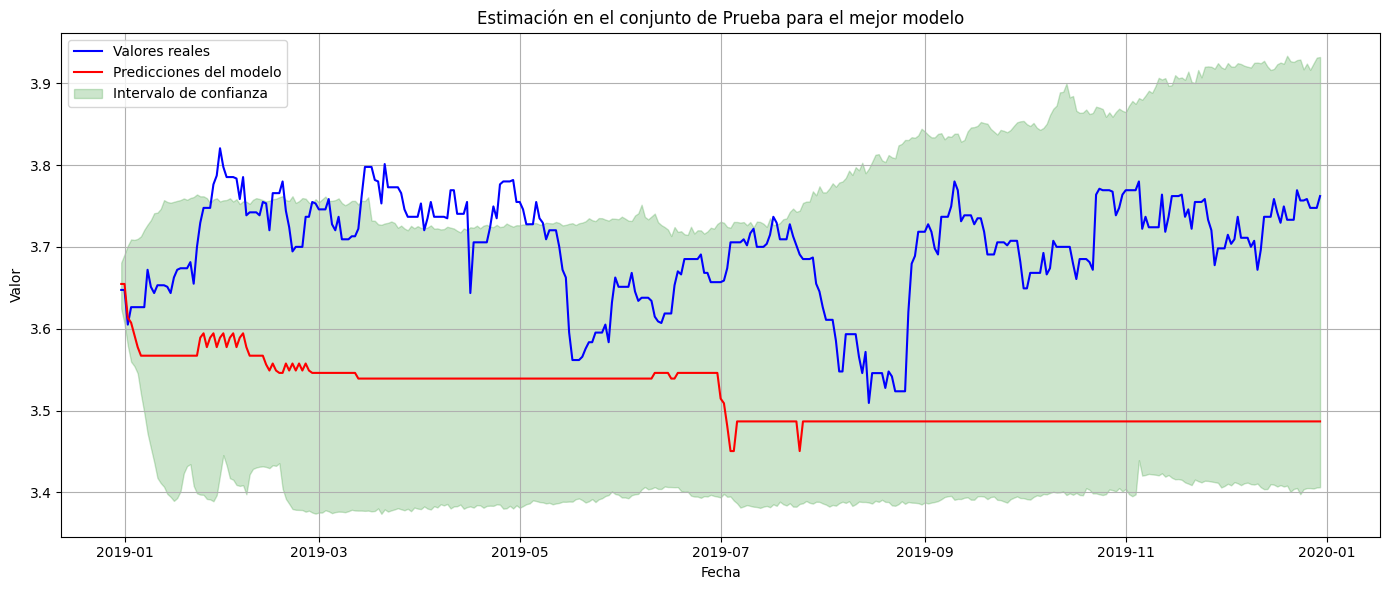

In [348]:
import matplotlib.pyplot as plt

# Crear la figura
plt.figure(figsize=(14, 6))

# Graficar los valores reales
plt.plot(test_feature.index, test_target, label='Valores reales', color='blue')

# Graficar las predicciones del modelo
plt.plot(predictions_df.index, predictions_df['pred'], label='Predicciones del modelo', color='red')

# Graficar el intervalo de confianza
plt.fill_between(
    predictions_df.index,
    predictions_df['lower_bound'],
    predictions_df['upper_bound'],
    color='green',
    alpha=0.2,
    label='Intervalo de confianza'
)

# Configurar etiquetas y leyenda
plt.title('Estimación en el conjunto de Prueba para el mejor modelo')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

<h2 style="color: #011f4b;">REGRESANDO A LA ESCALA ORIGINAL</h2>

In [349]:
from scipy.special import inv_boxcox

# Si tu lambda original era lambda_boxcox
lambda_boxcox = 0.17071798004770206  

In [350]:
Pred = predictions_df.apply(lambda x: inv_boxcox(x, lambda_boxcox))
print(Pred)

                 pred  lower_bound  upper_bound
Fecha                                          
2018-12-31  17.116949    16.802251    17.393067
2019-01-01  17.116949    16.611373    17.500984
2019-01-02  16.687849    16.337370    17.615240
2019-01-03  16.624200    16.138957    17.698441
2019-01-04  16.473714    16.084571    17.691802
...               ...          ...          ...
2019-12-26  15.420785    14.649227    20.157230
2019-12-27  15.420785    14.649457    20.065263
2019-12-28  15.420785    14.644673    20.156856
2019-12-29  15.420785    14.656767    20.244857
2019-12-30  15.420785    14.659212    20.255014

[365 rows x 3 columns]


In [351]:
Serie = ARGOS[['Fecha', 'Apertura']]
Serie

Fecha  Apertura
0    2010-01-04     18.98
1    2010-01-05     19.50
2    2010-01-06     19.40
3    2010-01-07     19.70
4    2010-01-08     19.70
...         ...       ...
3643 2019-12-26     18.24
3644 2019-12-27     18.12
3645 2019-12-28     18.12
3646 2019-12-29     18.12
3647 2019-12-30     18.28

[3648 rows x 2 columns]

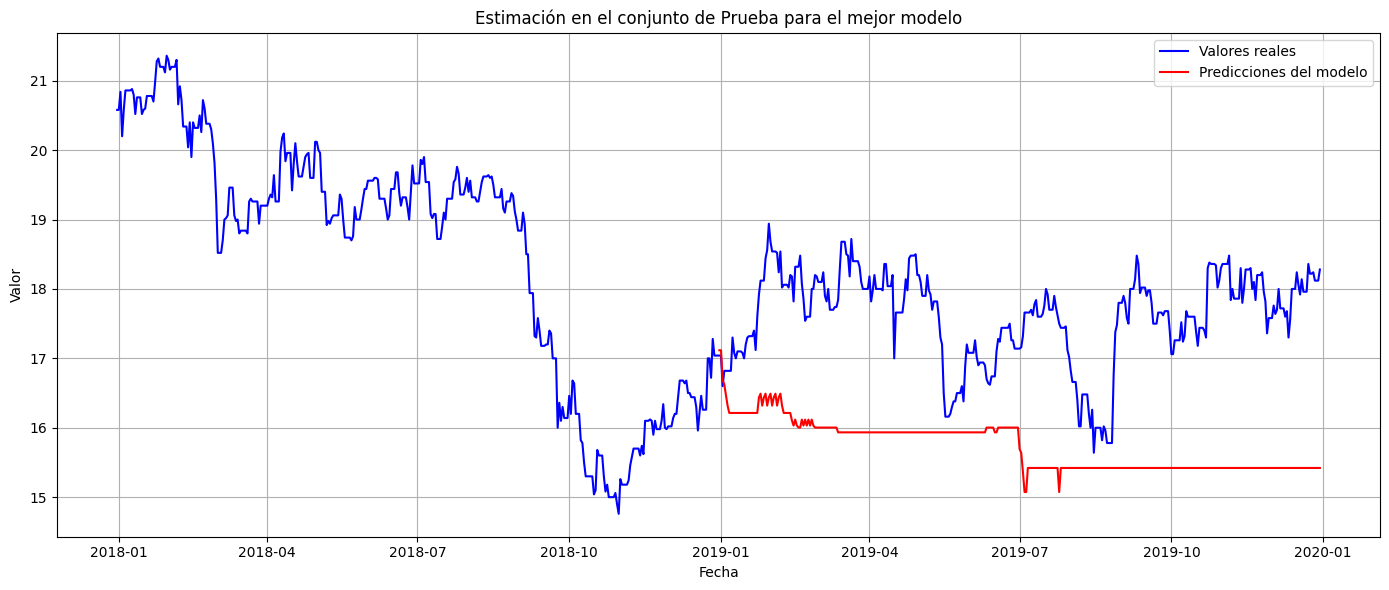

In [356]:
# Create the plot
plt.figure(figsize=(14, 6))
plt.plot(Serie.iloc[-730:]['Fecha'], Serie.iloc[-730:]['Apertura'], label='Valores reales', color='blue')
plt.plot( Pred['pred'], label='Predicciones del modelo', color='red')
plt.title('Estimación en el conjunto de Prueba para el mejor modelo')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [357]:
MSE = mean_squared_error(y_true= Serie['Apertura'][-365:], y_pred=Pred['pred'])
MSE

4.027377304650526

<center><h1 style="color: #011f4b;">ÁRBOLES DE DEDICIÓN SERIE DIFERENCIADA </h1></center>

In [358]:
DIFF = diff2_df
print(DIFF.head())
type(DIFF)

       Fecha  Diff_BoxCox
1 2010-01-05     0.044777
2 2010-01-06    -0.008533
3 2010-01-07     0.025492
4 2010-01-08     0.000000
5 2010-01-09     0.000000


pandas.core.frame.DataFrame

In [359]:
DIFF = DIFF.set_index('Fecha')['Diff_BoxCox']

# Verificar el resultado
print(DIFF.head())
print(type(DIFF))

Fecha
2010-01-05    0.044777
2010-01-06   -0.008533
2010-01-07    0.025492
2010-01-08    0.000000
2010-01-09    0.000000
Name: Diff_BoxCox, dtype: float64
<class 'pandas.core.series.Series'>


In [360]:
print('Complete Observations for Target after Supervised configuration: %d' %len(DIFF))
traintarget_size = int(len(DIFF) * 0.70) 
valtarget_size = int(len(DIFF) * 0.20)# Set split
testtarget_size = int(len(DIFF) * 0.10)# Set split
print(traintarget_size,valtarget_size,testtarget_size)
print('Train + Validation + Test: %d' %(traintarget_size+valtarget_size+testtarget_size))

Complete Observations for Target after Supervised configuration: 3647
2552 729 364
Train + Validation + Test: 3645


In [361]:
traintarget_size = int(len(DIFF) * 0.70) 
valtarget_size = int(len(DIFF) * 0.20)+1# Set split
testtarget_size = int(len(DIFF) * 0.10)# Set split
train_target, val_target,test_target = DIFF[0:traintarget_size],DIFF[(traintarget_size):(traintarget_size+valtarget_size)] ,DIFF[(traintarget_size+valtarget_size):len(DIFF)]

print('Observations for Target: %d' % (len(DIFF)))
print('Training Observations for Target: %d' % (len(train_target)))
print('Validation Observations for Target: %d' % (len(val_target)))
print('Test Observations for Target: %d' % (len(test_target)))

Observations for Target: 3647
Training Observations for Target: 2552
Validation Observations for Target: 730
Test Observations for Target: 365


In [362]:
trainfeature_size = int(len(DIFF) * 0.70)
valfeature_size = int(len(DIFF) * 0.20)+1# Set split
testfeature_size = int(len(DIFF) * 0.10)# Set split
train_feature, val_feature,test_feature = DIFF[0:traintarget_size],DIFF[(traintarget_size):(traintarget_size+valtarget_size)],DIFF[(traintarget_size+valtarget_size):len(DIFF)]

print('Observations for Feature: %d' % (len(DIFF)))
print('Training Observations for Feature: %d' % (len(train_feature)))
print('Validation Observations for Feature: %d' % (len(val_feature)))
print('Test Observations for Feature: %d' % (len(test_feature)))

Observations for Feature: 3647
Training Observations for Feature: 2552
Validation Observations for Feature: 730
Test Observations for Feature: 365


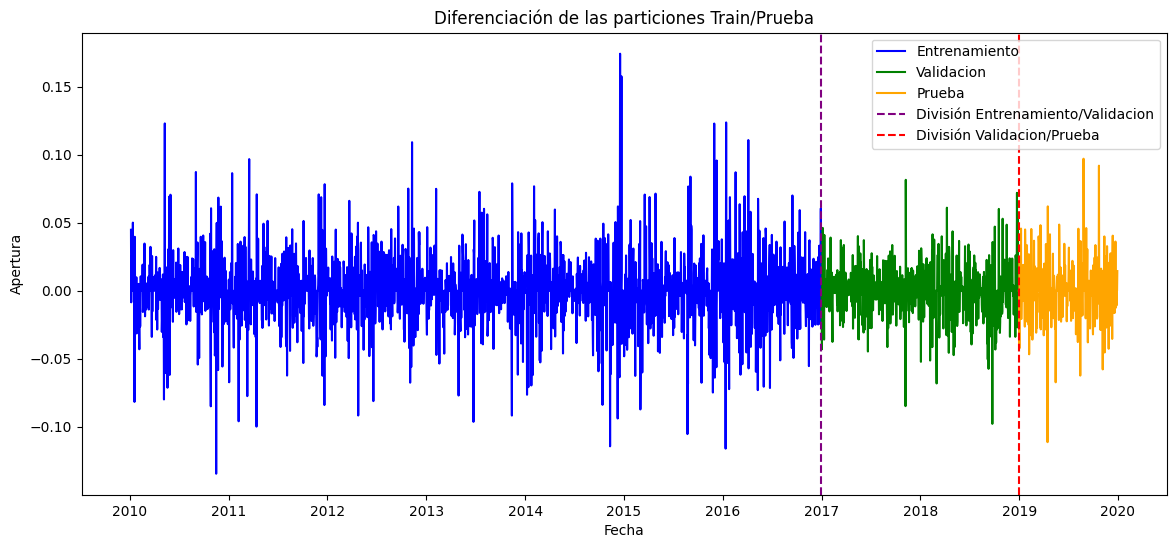

In [363]:
import matplotlib.pyplot as plt
import pandas as pd

# Crear la gráfica
plt.figure(figsize=(14, 6))

# Graficar los datos de entrenamiento
plt.plot(train_feature.index, train_feature, label='Entrenamiento', color='blue')

# Graficar los datos de Validacion
plt.plot(val_feature.index, val_feature, label='Validacion', color='green')

# Graficar los datos de prueba
plt.plot(test_feature.index, test_feature, label='Prueba', color='orange')

# Añadir líneas verticales para separar los conjuntos
split_date_val = val_feature.index[0]
plt.axvline(x=split_date_val, color='purple', linestyle='--', label='División Entrenamiento/Validacion')
split_date_test = test_feature.index[0]
plt.axvline(x=split_date_test, color='red', linestyle='--', label='División Validacion/Prueba')

# Configurar el título y las etiquetas
plt.title('Diferenciación de las particiones Train/Prueba')
plt.xlabel('Fecha')
plt.ylabel('Apertura')

# Añadir leyenda
plt.legend()

# Mostrar la gráfica
plt.show()

In [364]:
if isinstance(train_feature, pd.Series):
    train_feature = train_feature.to_frame()

if isinstance(val_feature, pd.Series):
    val_feature = val_feature.to_frame()

if isinstance(test_feature, pd.Series):
    test_feature = test_feature.to_frame()

In [365]:
if not isinstance(train_target, pd.Series):
    train_target = pd.Series(train_target)

if not isinstance(val_target, pd.Series):
    val_target = pd.Series(val_target)

if not isinstance(test_target, pd.Series):
    test_target = pd.Series(test_target)

In [366]:
print("Dimensiones de train_feature:", train_feature.shape)
print("Dimensiones de train_target:", train_target.shape)

Dimensiones de train_feature: (2552, 1)
Dimensiones de train_target: (2552,)


<h2 style="color: #011f4b;">PROBANDO UN ARBOL SENCILLO CON DecisionTreeRegressor</h2> 


In [367]:
from sklearn.tree import DecisionTreeRegressor

DT_Apertura = DecisionTreeRegressor() 
DT_Apertura.fit(train_feature, train_target)

# Check the score on train and test
print("Coeficiente R2 sobre el conjunto de entrenamiento:",DT_Apertura.score(train_feature, train_target))
print("Coeficiente R2 sobre el conjunto de Validación:",DT_Apertura.score(val_feature,val_target))
print("el RECM sobre validación es:",(((DT_Apertura.predict(val_feature)-val_target)**2).mean()) )

Coeficiente R2 sobre el conjunto de entrenamiento: 1.0
Coeficiente R2 sobre el conjunto de Validación: 0.9999400336850383
el RECM sobre validación es: 1.7644604159381438e-08


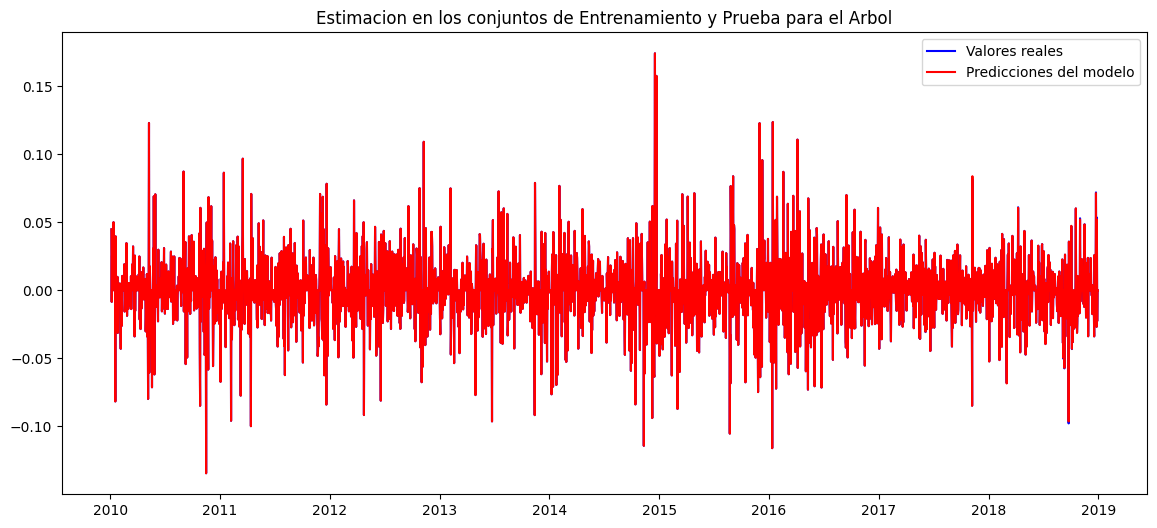

In [368]:
val_predictions = DT_Apertura.predict(np.concatenate([train_feature,val_feature]))

plt.figure(figsize=(14, 6))
plt.plot(np.concatenate([train_feature.index, val_feature.index]), np.concatenate([train_feature,val_feature]), label='Valores reales',color='blue')
plt.plot(np.concatenate([train_feature.index, val_feature.index]), val_predictions, label='Predicciones del modelo', color='red')
plt.title('Estimacion en los conjuntos de Entrenamiento y Prueba para el Arbol')
plt.legend()
plt.show()

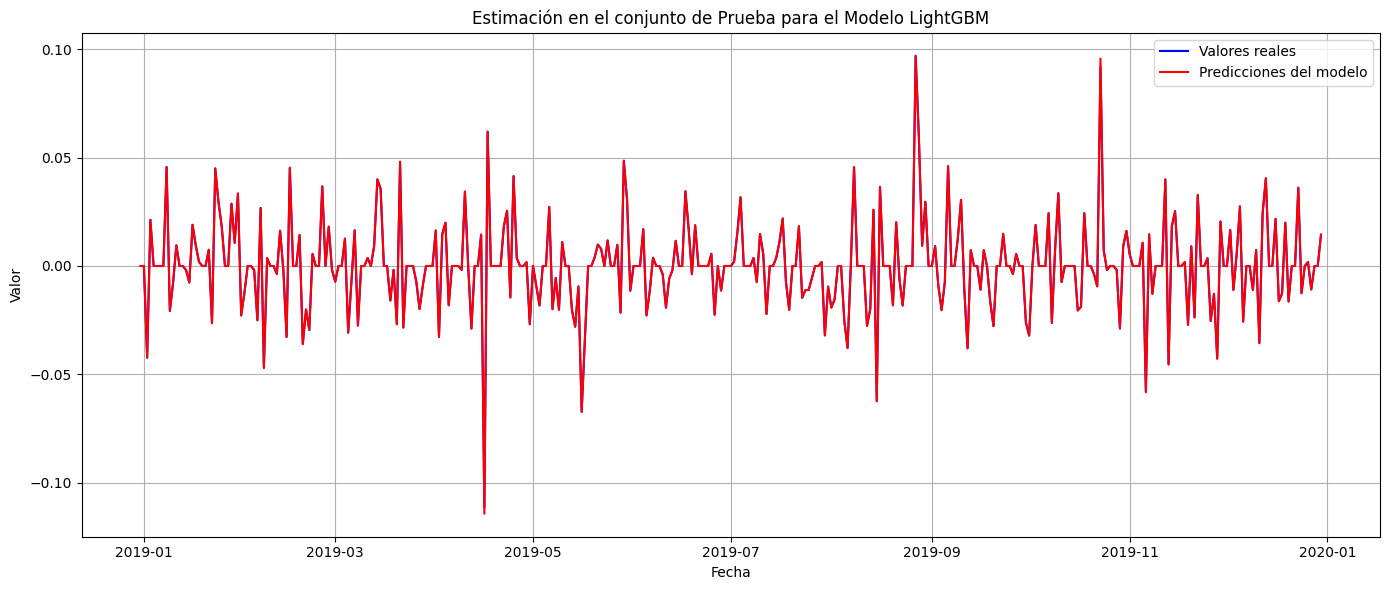

In [369]:
# Make predictions on the test set
test_predictions = DT_Apertura.predict(test_feature)

# Create the plot
plt.figure(figsize=(14, 6))
plt.plot(test_feature.index, test_target, label='Valores reales', color='blue')
plt.plot(test_feature.index, test_predictions, label='Predicciones del modelo', color='red')
plt.title('Estimación en el conjunto de Prueba para el Modelo LightGBM')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<h2 style="color: #011f4b;">PROBANDO UN ARBOL SENCILLO CON LGBMRegressor()</h2> 


In [370]:
DT_Apertura = LGBMRegressor() 
DT_Apertura.fit(train_feature, train_target)

# Check the score on train and test
print("Coeficiente R2 sobre el conjunto de entrenamiento:",DT_Apertura.score(train_feature, train_target))
print("Coeficiente R2 sobre el conjunto de Validación:",DT_Apertura.score(val_feature,val_target))
print("el RECM sobre validación es:",(((DT_Apertura.predict(val_feature)-val_target)**2).mean()) )

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000719 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 255
[LightGBM] [Info] Number of data points in the train set: 2552, number of used features: 1
[LightGBM] [Info] Start training from score 0.000018
Coeficiente R2 sobre el conjunto de entrenamiento: 0.9850764301249703
Coeficiente R2 sobre el conjunto de Validación: 0.9979451705570653
el RECM sobre validación es: 6.046169780272139e-07


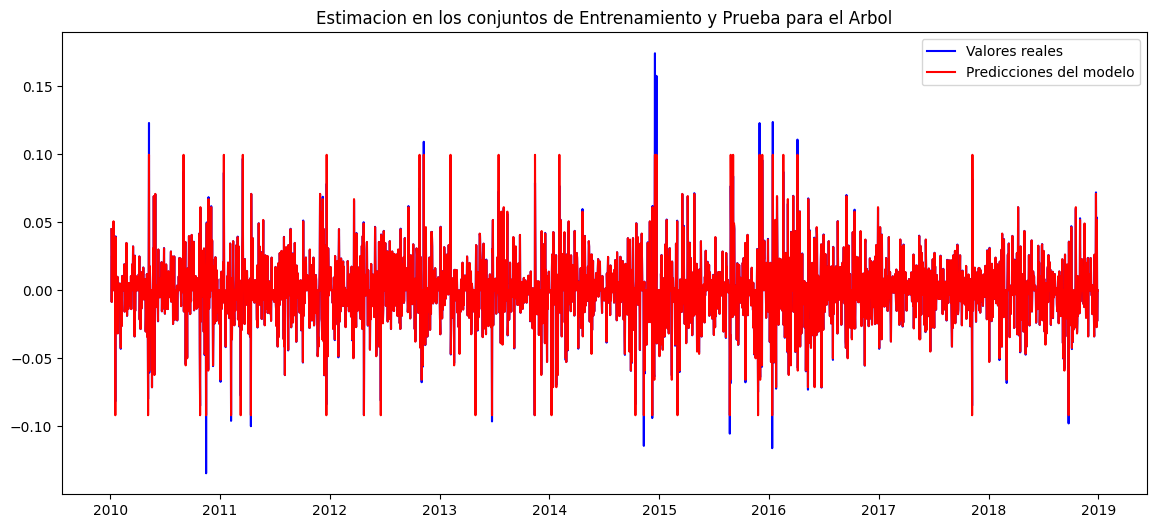

In [371]:
val_predictions = DT_Apertura.predict(np.concatenate([train_feature,val_feature]))

plt.figure(figsize=(14, 6))
plt.plot(np.concatenate([train_feature.index, val_feature.index]), np.concatenate([train_feature,val_feature]), label='Valores reales',color='blue')
plt.plot(np.concatenate([train_feature.index, val_feature.index]), val_predictions, label='Predicciones del modelo', color='red')
plt.title('Estimacion en los conjuntos de Entrenamiento y Prueba para el Arbol')
plt.legend()
plt.show()

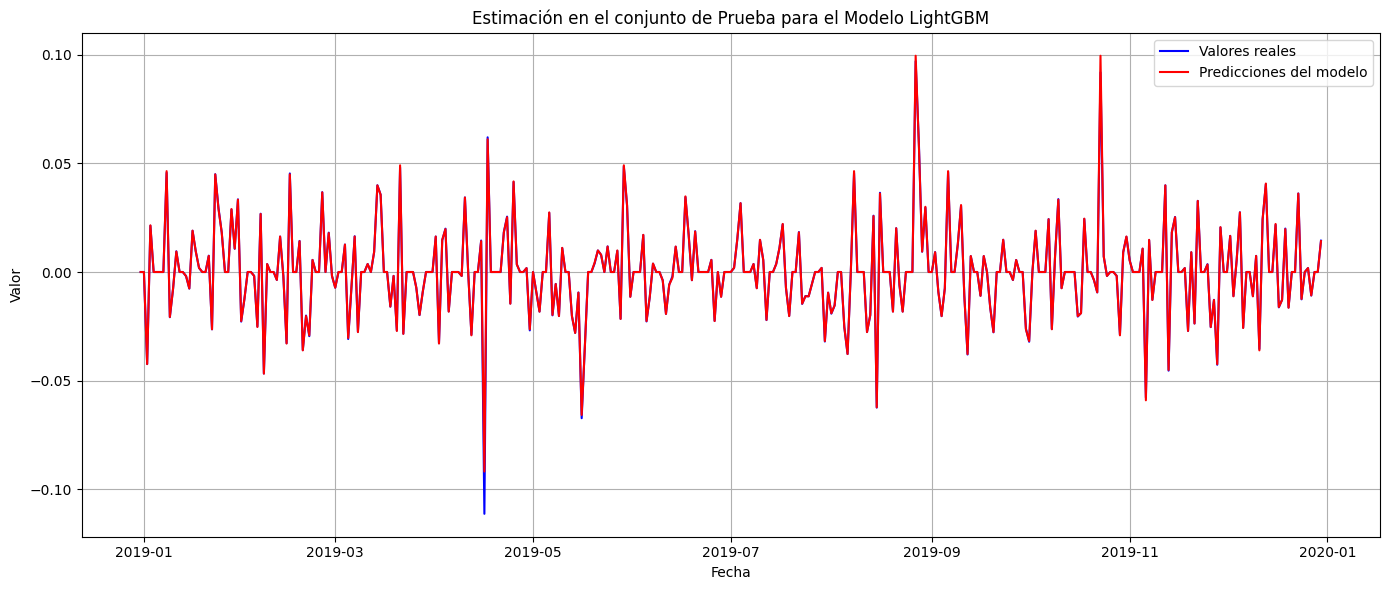

In [372]:
# Make predictions on the test set
test_predictions = DT_Apertura.predict(test_feature)

# Create the plot
plt.figure(figsize=(14, 6))
plt.plot(test_feature.index, test_target, label='Valores reales', color='blue')
plt.plot(test_feature.index, test_predictions, label='Predicciones del modelo', color='red')
plt.title('Estimación en el conjunto de Prueba para el Modelo LightGBM')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Tenenemos una baga idea de los rezagos que pueden ser elegido para la tarea de entrenar el árbol de decisión por tanto no disponemos a realizar el entrenamiento del arbol de la siguiennte manera: 
 
 - Nos gusta más la idea de usar LGBMRegressor, pero se hicieron pruebas de tiempo, y en 8 horas no pudo correr la mitad los modelos de una grilla pequeña, por lo se plantea utilizar DecissionTreeRegressor en su lugar.  
 - Para la eleccion de los rezagos no tiene mucho sentido pesar en una periodicidad semanal, pero al hacer el análisis del periodo nos encontramos con que el periodo es de 1216 unidades de tiempo lo cual equivale a 3.3 años por lo tanto usaremos ese periodo y trateremos de incluir algunos otros rezagos que pueden resultar utiles basandonos en los demas análisis de periodicidad
     - [1]: El primer rezago, que es crucial según el PACF.
     - [365]: El rezago anual, basado en el patrón estacional y el análisis de Fourier.
     - [1, 365]: Combinación del rezago diario y anual.
     - [1, 2, 365, 728, 1216]: Incluimos el periodo dominante del periodograma.
     - [1, 2, 303, 365, 728, 1216, 1822]: Añadimos el periodo más fuerte del análisis de Fourier (1822) y el ciclo de 10 meses (303).
     - [1, 2, 228, 303, 365, 728, 1216, 1822]: Finalmente, incluimos el ciclo de 7.5 meses (228) del análisis de Fourier.

In [420]:
rezagos = [1, [1, 2, 182, 365], 365, 730,
           182, [1, 2, 365, 728, 1216],
           [1, 2, 365, 728, 1216, 1822]
          ]

# Definir los hiperparámetros para la búsqueda
hiperparametros = {
    'max_depth': list(range(4, 12)),
    'min_samples_leaf': list(range(5, 15)),
    'ccp_alpha': [0.0, 0.01]
}

In [422]:
DT_Apertura = ForecasterAutoreg(
    regressor = DecisionTreeRegressor(random_state=123),
    lags = 1
)

In [423]:
train_feature_series = train_feature.squeeze()  # Squeeze the DataFrame to a Series
print(train_feature_series.head(5))
val_feature_series = val_feature.squeeze()  # Squeeze the DataFrame to a Series
print(val_feature_series.head(5))

Fecha
2010-01-05    0.044777
2010-01-06   -0.008533
2010-01-07    0.025492
2010-01-08    0.000000
2010-01-09    0.000000
Name: Diff_BoxCox, dtype: float64
Fecha
2016-12-31    0.000000
2017-01-01    0.000000
2017-01-02   -0.043036
2017-01-03    0.001739
2017-01-04    0.010405
Name: Diff_BoxCox, dtype: float64


In [424]:
TrainVal_Feature = np.concatenate([train_feature_series,val_feature_series])

In [425]:
if not isinstance(TrainVal_Feature, pd.Series):
    TrainVal_Feature = pd.Series(TrainVal_Feature)

TrainVal_Feature

0       0.044777
1      -0.008533
2       0.025492
3       0.000000
4       0.000000
          ...   
3277   -0.026900
3278    0.053435
3279   -0.022722
3280    0.000000
3281    0.000000
Length: 3282, dtype: float64

In [426]:
import os
import multiprocessing


num_processors = os.cpu_count()
print(f"Número de procesadores: {num_processors}")
n_jobs = multiprocessing.cpu_count() - 4

Número de procesadores: 8


In [427]:
# Realizar la búsqueda de hiperparámetros usando solo los conjuntos de entrenamiento y validación
tuning = grid_search_forecaster(
    forecaster=DT_Apertura,
    y=TrainVal_Feature,  # Subconjunto de datos con índices de fecha
    param_grid=hiperparametros,
    lags_grid=rezagos,
    steps= 365,
    metric='mean_squared_error',
    initial_train_size=int(len(TrainVal_Feature) * 0.8),
    fixed_train_size=False,
    return_best=True,
    verbose=False,
    show_progress=True,
    n_jobs=n_jobs  # Añadimos el parámetro n_jobs para paralelización
)

Number of models compared: 1120.


lags grid:   0%|          | 0/7 [00:00<?, ?it/s]

params grid:   0%|          | 0/160 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [1] 
  Parameters: {'ccp_alpha': 0.0, 'max_depth': 4, 'min_samples_leaf': 5}
  Backtesting metric: 0.00030209186727809417



In [428]:
tuning = tuning.sort_values(by = ['mean_squared_error', 'max_depth', 'min_samples_leaf'])
tuning

lags  \
0                                                   [1]   
1                                                   [1]   
2                                                   [1]   
47                                                  [1]   
641   [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
...                                                 ...   
555   [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
1030                       [1, 2, 365, 728, 1216, 1822]   
553   [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
544   [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
554   [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   

                                             lags_label  \
0                                                   [1]   
1                                                   [1]   
2                                                   [1]   
47                                                  [1]   
641   [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
...                                                 ...   
555   [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
1030                       [1, 2, 365, 728, 1216, 1822]   
553   [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
544   [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
554   [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   

                                                 params  mean_squared_error  \
0     {'ccp_alpha': 0.0, 'max_depth': 4, 'min_sample...            0.000302   
1     {'ccp_alpha': 0.0, 'max_depth': 4, 'min_sample...            0.000302   
2     {'ccp_alpha': 0.0, 'max_depth': 4, 'min_sample...            0.000302   
47    {'ccp_alpha': 0.0, 'max_depth': 8, 'min_sample...            0.000302   
641   {'ccp_alpha': 0.0, 'max_depth': 4, 'min_sample...            0.000302   
...                                                 ...                 ...   
555   {'ccp_alpha': 0.0, 'max_depth': 11, 'min_sampl...            0.000471   
1030  {'ccp_alpha': 0.0, 'max_depth': 11, 'min_sampl...            0.000471   
553   {'ccp_alpha': 0.0, 'max_depth': 11, 'min_sampl...            0.000485   
544   {'ccp_alpha': 0.0, 'max_depth': 10, 'min_sampl...            0.000497   
554   {'ccp_alpha': 0.0, 'max_depth': 11, 'min_sampl...            0.000524   

      ccp_alpha  max_depth  min_samples_leaf  
0           0.0        4.0               5.0  
1           0.0        4.0               6.0  
2           0.0        4.0               7.0  
47          0.0        8.0              12.0  
641         0.0        4.0               6.0  
...         ...        ...               ...  
555         0.0       11.0              10.0  
1030        0.0       11.0               5.0  
553         0.0       11.0               8.0  
544         0.0       10.0               9.0  
554         0.0       11.0               9.0  

[1120 rows x 7 columns]

In [429]:
tuning = tuning[0:1]
tuning['model'] = 'decission tree'
tuning

lags lags_label                                             params  \
0  [1]        [1]  {'ccp_alpha': 0.0, 'max_depth': 4, 'min_sample...   

   mean_squared_error  ccp_alpha  max_depth  min_samples_leaf           model  
0            0.000302        0.0        4.0               5.0  decission tree

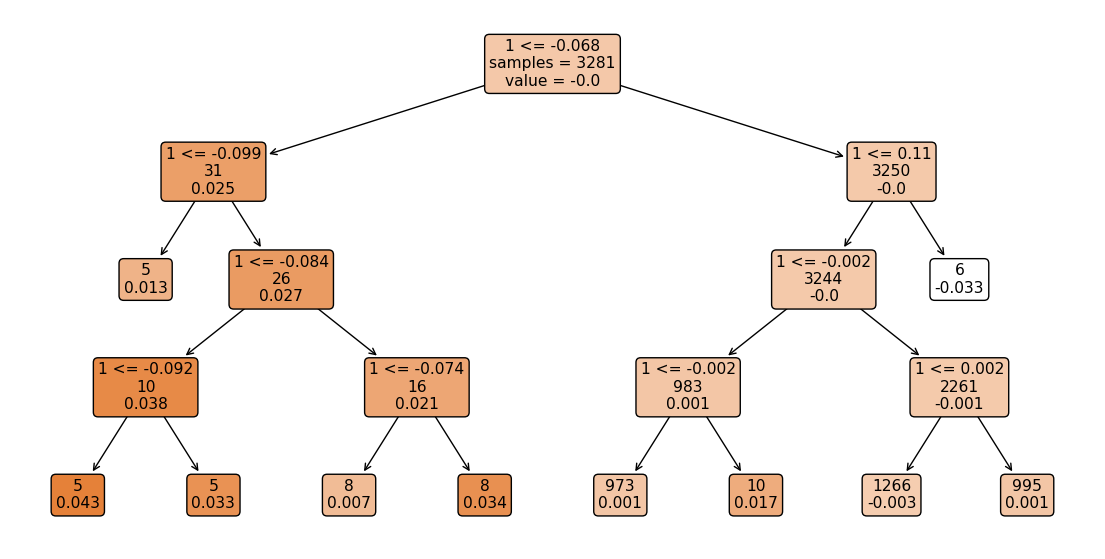

In [430]:
# Crear una visualización del árbol
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Crear una visualización del árbol
plt.figure(figsize=(14,7))
plot_tree(DT_Apertura.regressor,
          filled=True, feature_names=DT_Apertura.lags, rounded=True,
          impurity=False, label='root')
plt.show()

In [431]:
DT_Apertura.get_feature_importances()['importance']

0    1.0
Name: importance, dtype: float64

In [456]:
DT_Apertura = ForecasterAutoreg(
    regressor = DecisionTreeRegressor(max_depth=4, min_samples_leaf=5),
    lags = 365
)

DT_Apertura.fit(TrainVal_Feature)

In [457]:
DT_Apertura

ForecasterAutoreg 
Regressor: DecisionTreeRegressor(max_depth=4, min_samples_leaf=5) 
Lags: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224

In [458]:
# Concatenar los índices de train_feature y val_feature
new_index = np.concatenate([train_feature.index, val_feature.index])

# Asignar el nuevo índice a TrainVal_Feature
TrainVal_Feature.index = new_index

# Asegurarse de que el índice esté ordenado
TrainVal_Feature.sort_index(inplace=True)

# Mostrar los primeros registros para verificar
print(TrainVal_Feature.head())

# Mostrar información sobre el DataFrame
print(TrainVal_Feature.info())

2010-01-05    0.044777
2010-01-06   -0.008533
2010-01-07    0.025492
2010-01-08    0.000000
2010-01-09    0.000000
dtype: float64
<class 'pandas.core.series.Series'>
DatetimeIndex: 3282 entries, 2010-01-05 to 2018-12-30
Series name: None
Non-Null Count  Dtype  
--------------  -----  
3282 non-null   float64
dtypes: float64(1)
memory usage: 51.3 KB
None


In [459]:
#int(len(test_feature))
print(TrainVal_Feature.head)
print(test_feature.head)

<bound method NDFrame.head of 2010-01-05    0.044777
2010-01-06   -0.008533
2010-01-07    0.025492
2010-01-08    0.000000
2010-01-09    0.000000
                ...   
2018-12-26   -0.026900
2018-12-27    0.053435
2018-12-28   -0.022722
2018-12-29    0.000000
2018-12-30    0.000000
Length: 3282, dtype: float64>
<bound method NDFrame.head of             Diff_BoxCox
Fecha                  
2018-12-31     0.000000
2019-01-01     0.000000
2019-01-02    -0.042356
2019-01-03     0.021293
2019-01-04     0.000000
...                 ...
2019-12-26     0.001801
2019-12-27    -0.010830
2019-12-28     0.000000
2019-12-29     0.000000
2019-12-30     0.014427

[365 rows x 1 columns]>


In [460]:
# Hacer predicciones
predicciones = DT_Apertura.predict(365)
print(predicciones.head())

365   -0.003624
366    0.000787
367    0.000787
368    0.000787
369    0.000787
Name: pred, dtype: float64


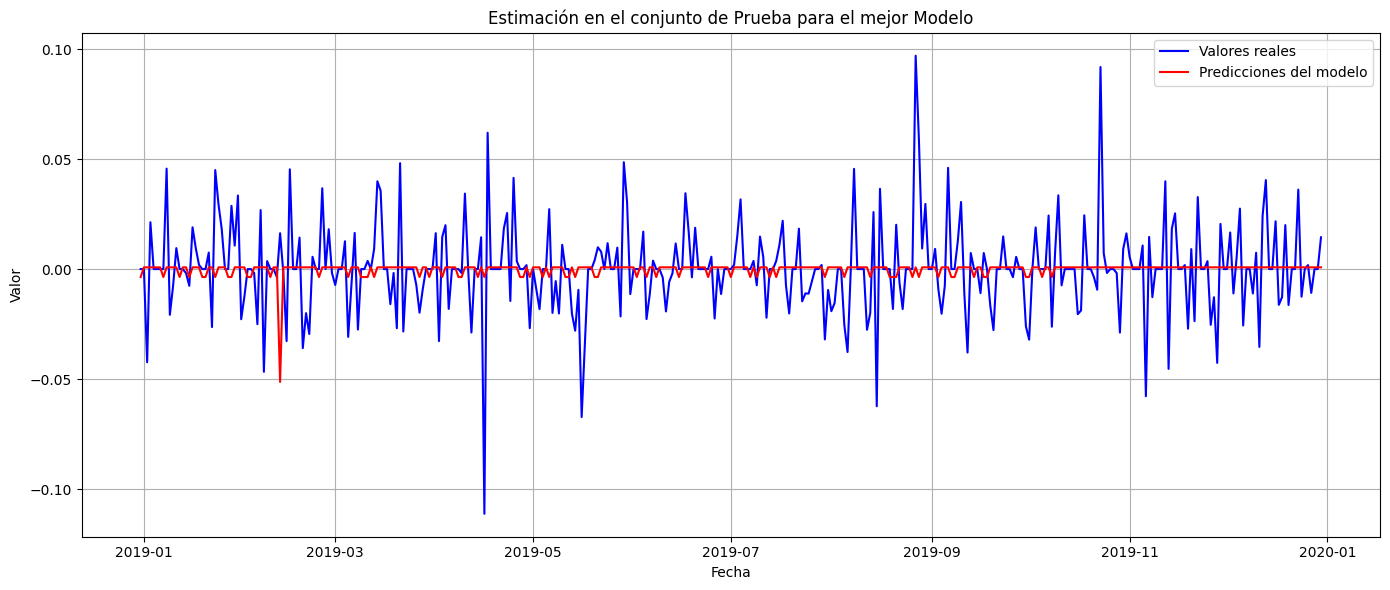

In [461]:
# Create the plot
plt.figure(figsize=(14, 6))
plt.plot(test_feature.index, test_target, label='Valores reales', color='blue')
plt.plot(test_feature.index, predicciones, label='Predicciones del modelo', color='red')
plt.title('Estimación en el conjunto de Prueba para el mejor Modelo')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [462]:
MSE = mean_squared_error(y_true= test_target, y_pred=test_prediction)

tuning['MSE test'] =  MSE
tuning

lags lags_label                                             params  \
0  [1]        [1]  {'ccp_alpha': 0.0, 'max_depth': 4, 'min_sample...   

   mean_squared_error  ccp_alpha  max_depth  min_samples_leaf           model  \
0            0.000302        0.0        4.0               5.0  decission tree   

    MSE test  
0  12.381657

In [513]:
# Prediction intervals

predictions = DT_Apertura.predict_interval(
                    steps    = 365,
                    interval = [5, 95],
                    n_boot   = 1000
              )

# Add datetime index to predictions
#predictions = pd.DataFrame(data=predictions, index=test_target.index)
predictions.head()

pred  lower_bound  upper_bound
365 -0.003624    -0.038652     0.032241
366  0.000787    -0.032968     0.036508
367  0.000787    -0.037468     0.036799
368  0.000787    -0.035079     0.038623
369  0.000787    -0.037468     0.036508

In [492]:
test_target

Fecha
2018-12-31    0.000000
2019-01-01    0.000000
2019-01-02   -0.042356
2019-01-03    0.021293
2019-01-04    0.000000
                ...   
2019-12-26    0.001801
2019-12-27   -0.010830
2019-12-28    0.000000
2019-12-29    0.000000
2019-12-30    0.014427
Name: Diff_BoxCox, Length: 365, dtype: float64

In [514]:
# Crear DataFrame con predicciones, usando directamente el índice de test_target
predictions_df = pd.DataFrame(data=predictions)
predictions_df.index = test_target.index

print(predictions_df.head())

                pred  lower_bound  upper_bound
Fecha                                         
2018-12-31 -0.003624    -0.038652     0.032241
2019-01-01  0.000787    -0.032968     0.036508
2019-01-02  0.000787    -0.037468     0.036799
2019-01-03  0.000787    -0.035079     0.038623
2019-01-04  0.000787    -0.037468     0.036508


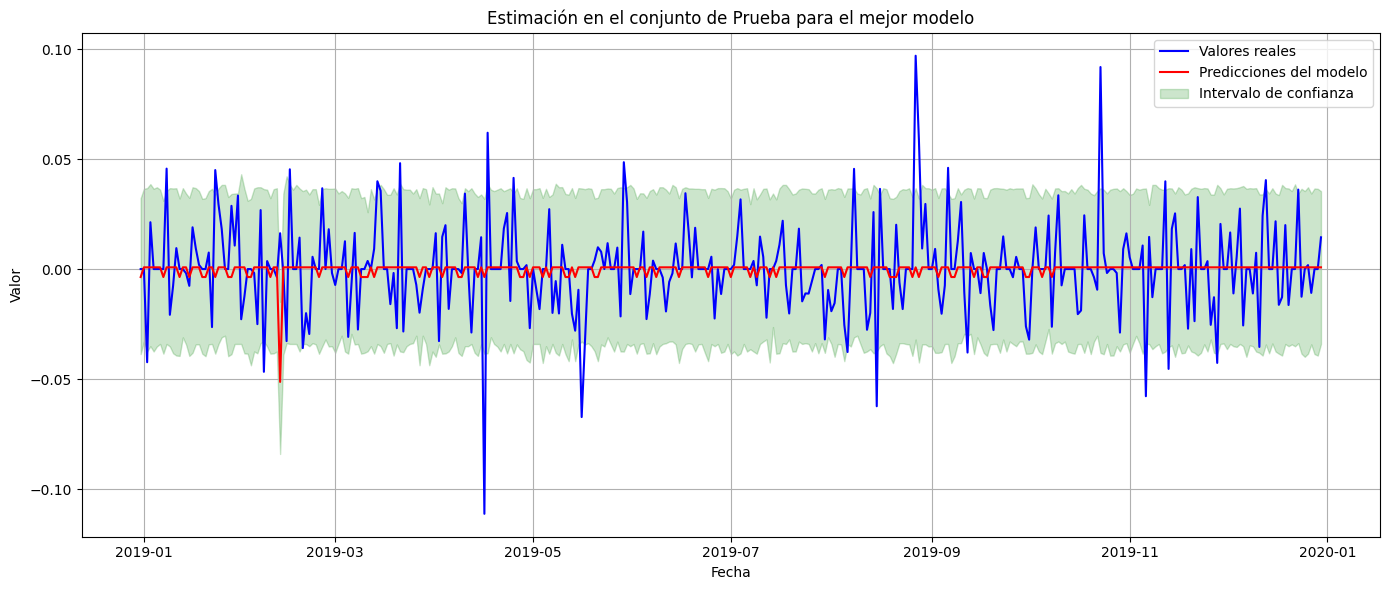

In [515]:
import matplotlib.pyplot as plt

# Crear la figura
plt.figure(figsize=(14, 6))

# Graficar los valores reales
plt.plot(test_feature.index, test_target, label='Valores reales', color='blue')

# Graficar las predicciones del modelo
plt.plot(predictions_df.index, predictions_df['pred'], label='Predicciones del modelo', color='red')

# Graficar el intervalo de confianza
plt.fill_between(
    predictions_df.index,
    predictions_df['lower_bound'],
    predictions_df['upper_bound'],
    color='green',
    alpha=0.2,
    label='Intervalo de confianza'
)

# Configurar etiquetas y leyenda
plt.title('Estimación en el conjunto de Prueba para el mejor modelo')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

<h2 style="color: #011f4b;">REGRESANDO A LA ESCALA ORIGINAL</h2> 


In [504]:
from scipy.special import inv_boxcox

# Si tu lambda original era lambda_boxcox
lambda_boxcox = 0.17071798004770206  

In [505]:
print(diff2_df)

          Fecha  Diff_BoxCox
1    2010-01-05     0.044777
2    2010-01-06    -0.008533
3    2010-01-07     0.025492
4    2010-01-08     0.000000
5    2010-01-09     0.000000
...         ...          ...
3643 2019-12-26     0.001801
3644 2019-12-27    -0.010830
3645 2019-12-28     0.000000
3646 2019-12-29     0.000000
3647 2019-12-30     0.014427

[3647 rows x 2 columns]


In [517]:
reverted_diff = np.cumsum(np.insert(predictions_df['pred'], 0, BoxCox[-366]))
reverted_diff

array([3.64744344, 3.64381903, 3.6446062 , 3.64539337, 3.64618053,
       3.6469677 , 3.64775487, 3.64854203, 3.64491763, 3.6457048 ,
       3.64649196, 3.64727913, 3.6480663 , 3.64444189, 3.64522906,
       3.64601623, 3.64239182, 3.64317899, 3.64396616, 3.64475332,
       3.64112892, 3.63750452, 3.63829168, 3.63907885, 3.63545445,
       3.63624161, 3.63702878, 3.63781595, 3.63419154, 3.63056714,
       3.63135431, 3.63214147, 3.63292864, 3.63371581, 3.6300914 ,
       3.626467  , 3.62725417, 3.62804133, 3.6288285 , 3.62961567,
       3.63040283, 3.62677843, 3.6275656 , 3.62835276, 3.57704415,
       3.57783132, 3.57861848, 3.57940565, 3.58019282, 3.58097998,
       3.58176715, 3.58255431, 3.58334148, 3.58412865, 3.58491581,
       3.58570298, 3.58207858, 3.58286574, 3.58365291, 3.58444008,
       3.58522724, 3.58601441, 3.58680158, 3.58758874, 3.58837591,
       3.58475151, 3.58553867, 3.58632584, 3.58711301, 3.5834886 ,
       3.5798642 , 3.5762398 , 3.57702696, 3.57340256, 3.57418

In [519]:
Pred = inv_boxcox(reverted_diff, lambda_boxcox)
print(Pred)

[17.04       17.00197495 17.01022744 17.01848325 17.02674238 17.03500484
 17.04327062 17.05153973 17.01349332 17.02175044 17.03001089 17.03827466
 17.04654176 17.0085046  17.01675972 17.02501816 16.98702084 16.99526731
 17.0035171  17.01177021 16.97379741 16.93589493 16.94412082 16.95235001
 16.91448726 16.92270452 16.93092509 16.93914897 16.90131068 16.86354251
 16.87173924 16.87993927 16.88814261 16.89634926 16.85859028 16.8209013
 16.82908085 16.83726368 16.84544982 16.85363926 16.861832   16.82413701
 16.83231786 16.840502   16.31390145 16.32187601 16.32985381 16.33783484
 16.34581911 16.35380661 16.36179735 16.36979132 16.37778853 16.38578899
 16.39379268 16.40179962 16.36495965 16.3729549  16.3809534  16.38895513
 16.39696011 16.40496833 16.41297979 16.4209945  16.42901245 16.39212179
 16.40012804 16.40813755 16.41615029 16.37928359 16.34248556 16.30575613
 16.31372739 16.27705157 16.2850112  16.29297405 16.30094013 16.30890944
 16.31688199 16.32485776 16.33283676 16.340819   16.

In [520]:
Serie = ARGOS[['Fecha', 'Apertura']]
Serie

Fecha  Apertura
0    2010-01-04     18.98
1    2010-01-05     19.50
2    2010-01-06     19.40
3    2010-01-07     19.70
4    2010-01-08     19.70
...         ...       ...
3643 2019-12-26     18.24
3644 2019-12-27     18.12
3645 2019-12-28     18.12
3646 2019-12-29     18.12
3647 2019-12-30     18.28

[3648 rows x 2 columns]

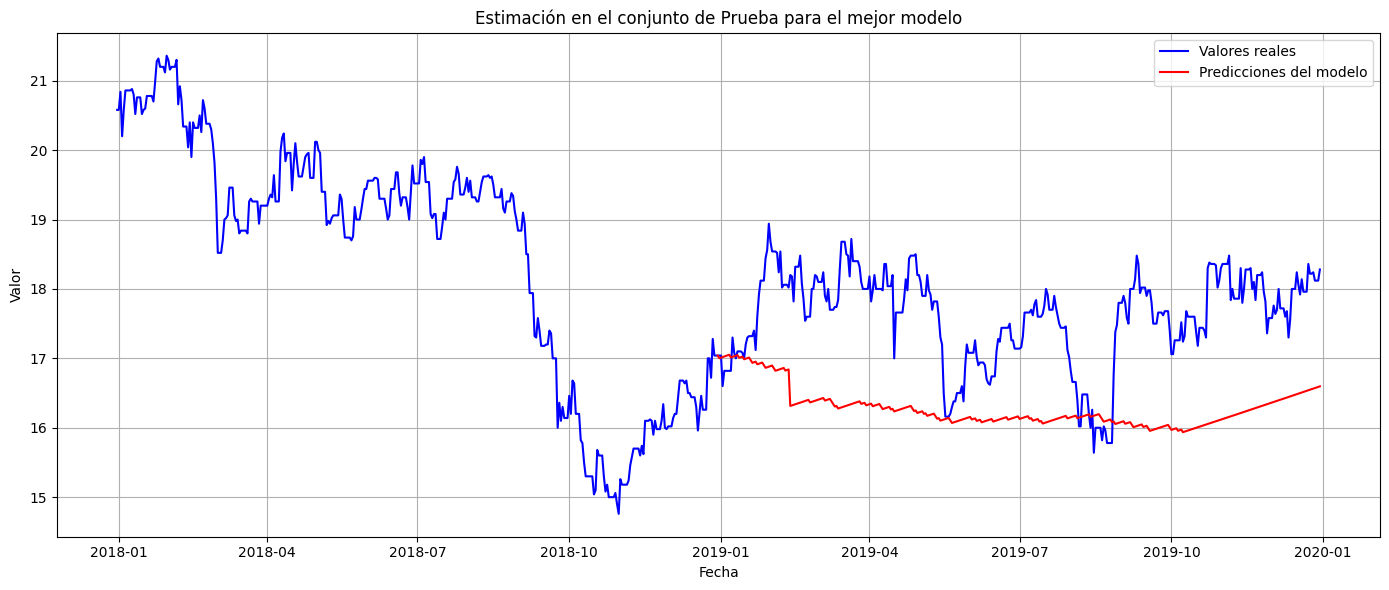

In [522]:
# Create the plot
plt.figure(figsize=(14, 6))
plt.plot(Serie.iloc[-730:]['Fecha'], Serie.iloc[-730:]['Apertura'], label='Valores reales', color='blue')
plt.plot(Serie.iloc[-366:]['Fecha'], Pred, label='Predicciones del modelo', color='red')
plt.title('Estimación en el conjunto de Prueba para el mejor modelo')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [525]:
MSE = mean_squared_error(y_true= Serie['Apertura'][-366:], y_pred=Pred)
MSE

2.1823749343614383